In [1]:
# 1

########## 30 July 2019 ##########
# In this notebook, we're taking the Master Catalog
# of NGC 6822 sources from UKIRT and Spitzer
# and making figures important for my paper.
#
# This will include spatial distribution plots,
# as well as potentially TRGB and metallicity,
# and pie charts for number distribution.

In [2]:
# 2

# First thing needed is to import the relevant Python libraries.

import numpy as np
import pandas as pd
from astropy.table import Table, Column, MaskedColumn
from astropy.io import ascii
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u

In [3]:
# 3

MASTERCAT = pd.read_csv('MASTERCATALOG_ahirschauer.csv')
Crich = pd.read_csv('Crich_reliable.csv')
Orich = pd.read_csv('Orich_reliable.csv')
Background = pd.read_csv('Background_reliable.csv')
Unclassifiable = pd.read_csv('Unclassifiable_reliable.csv')
Star = pd.read_csv('Stars_reliable.csv')
YSO = pd.read_csv('YSO_reliable.csv')
MASTERCATALOG = pd.read_csv('MASTERCATALOG_FINAL.csv')

print(len(MASTERCAT))
print(len(Orich))
print(len(Crich))
print(len(Background))
print(len(Unclassifiable))
print(len(Star))
print(len(YSO))
print('')
print(len(MASTERCATALOG))
print('')
print('')

CMD1Star = pd.read_csv('CMD1_region1.csv')
CMD1Orich = pd.read_csv('CMD1_region2.csv')
CMD1Orichdusty = pd.read_csv('CMD1_region3.csv')
CMD1Crich = pd.read_csv('CMD1_region4.csv')
CMD1Dusty = pd.read_csv('CMD1_region5.csv')

CMD1Orichcombine = [CMD1Orich, CMD1Orichdusty]
CMD1Orichconcat = pd.concat(CMD1Orichcombine)
CMD1Orichconcatdropduplicates = pd.concat([CMD1Orichconcat]).drop_duplicates(keep='first')

CMD2Star = pd.read_csv('CMD2_region1.csv')
CMD2Orich = pd.read_csv('CMD2_region2.csv')
CMD2Orichdusty = pd.read_csv('CMD2_region3.csv')
CMD2Crich = pd.read_csv('CMD2_region4.csv')
CMD2Dusty = pd.read_csv('CMD2_region5.csv')

CMD2Orichcombine = [CMD2Orich, CMD2Orichdusty]
CMD2Orichconcat = pd.concat(CMD2Orichcombine)
CMD2Orichconcatdropduplicates = pd.concat([CMD2Orichconcat]).drop_duplicates(keep='first')

CMD3Star = pd.read_csv('CMD3_region1.csv')
CMD3Orich = pd.read_csv('CMD3_region2.csv')
CMD3Crich = pd.read_csv('CMD3_region3.csv')
CMD3Dusty = pd.read_csv('CMD3_region4.csv')
CMD3Galaxy = pd.read_csv('CMD3_region5.csv')

print(len(CMD1Star))
print(len(CMD1Orich))
print(len(CMD1Orichdusty))
print(len(CMD1Crich))
print(len(CMD1Dusty))
print('')
print(len(CMD1Orichconcat))
print(len(CMD1Orichconcatdropduplicates))
print('')
print(len(CMD2Star))
print(len(CMD2Orich))
print(len(CMD2Orichdusty))
print(len(CMD2Crich))
print(len(CMD2Dusty))
print('')
print(len(CMD2Orichconcat))
print(len(CMD2Orichconcatdropduplicates))
print('')
print(len(CMD3Star))
print(len(CMD3Orich))
print(len(CMD3Crich))
print(len(CMD3Dusty))
print(len(CMD3Galaxy))

#print('')
#print('')
#print(CMD1Orichconcatdropduplicates)

jMINUSkDATA = pd.read_csv('jMINUSk.csv')
jMINUSthreesixDATA = pd.read_csv('jMINUSthreesix.csv')
threesixMINUSeightzeroDATA = pd.read_csv('threesixMINUSeightzero.csv')
jMINUSeightzeroDATA = pd.read_csv('jMINUSeightzero.csv')
eightzeroMINUStwentyfourDATA = pd.read_csv('eightzeroMINUStwentyfour.csv')
fourfiveMINUSeightzeroDATA = pd.read_csv('fourfiveMINUSeightzero.csv')
threesixMINUSfourfiveDATA = pd.read_csv('threesixMINUSfourfive.csv')

30745
2583
563
13765
9706
1911
310

30745


1636
2075
1002
907
144

3077
3077

1896
1571
1545
713
230

3116
3116

615
674
2949
630
15546


In [4]:
# 4

# This is Libby's code which takes the C-rich and O-rich star arrays
# and computes the C/O ratio and the error associated with that.

#----------------------#

def c2o_calc(number_cstars,number_mstars):
    """
    Calculculates the C/O ratio and error given:
    number_cstars : number of carbon stars
    number_mstars : number of m stars
    """

    c2o_pop    = number_cstars / number_mstars

    # Calculate error in population using poisson statistics
    err_cstars_pop = np.sqrt(number_cstars)
    err_mstars_pop = np.sqrt(number_mstars)

    # Calculate the error in c/o ratio
    c2o_err_pop = c2o_pop *np.sqrt(((err_mstars_pop  / number_mstars)**2)  + \
                                   ((err_cstars_pop  / number_cstars)**2))

    return c2o_pop, c2o_err_pop

def metallicity_calc(c2o_ratio,err_c2o_ratio):
    """
   Calculculates the metallicity and error using the Cioni (2009) relation:
    [Fe/H] = (-1.39 +/- 0.06) - (0.47 +/- 0.10) * log(C/M)

    given:-
    c2o_ratio: The ratio of C/M stars
    err_c2o_ratio: The error in the C/M ratio
    """
    # There are 8 possble permuntations in the [Fe/H] value accounting for the errors
    # The largest possible range is the error is calculated below:

    if (c2o_ratio - err_c2o_ratio > 0.):

        calc_Fe_H_pop    = -1.39 - (0.47 *np.log10(c2o_ratio))

        # Gives highest metallicity value  eg   Fe/H = -0.89
        err1_calc_Fe_H_pop  = abs(calc_Fe_H_pop - (-1.33 - (0.57 * np.log10(c2o_ratio - err_c2o_ratio))))
        # Gives most metal poor value      Vs  Fe/H = -1.33 - This is correct
        err2_calc_Fe_H_pop  = abs((-1.45 - (0.37 * np.log10(c2o_ratio + err_c2o_ratio)))- calc_Fe_H_pop)

    elif (c2o_ratio > 0.) :
        calc_Fe_H_pop       = -1.39 - (0.47 *np.log10(c2o_ratio))
        err1_calc_Fe_H_pop  = 0.0
        err2_calc_Fe_H_pop  = abs((-1.45 - (0.37 * np.log10(c2o_ratio + err_c2o_ratio)))- calc_Fe_H_pop)
    else:
        calc_Fe_H_pop       = 0.0
        err1_calc_Fe_H_pop  = 0.0
        err2_calc_Fe_H_pop  = 0.0

    return calc_Fe_H_pop, err1_calc_Fe_H_pop, err2_calc_Fe_H_pop

In [5]:
# 5

# This prints out the C/O ratio and its associated error.
# By the way, you can say "print(ratio_C_O[0]" to get just the ratio,
# or "print(ratio_C_O[1])" to get just the error

ratio_C_O = c2o_calc(len(Crich), len(Orich))
print(ratio_C_O)

print('')

# This calculates and prints out the [Fe/H] with error based on the C/O ratio.

ratio_Fe_H = metallicity_calc(ratio_C_O[0], ratio_C_O[1])
print(ratio_Fe_H)

# NB this is for the entire sample

(0.21796360820751065, 0.010137875355751067)

(-1.0790404746786735, 0.13795186192490327, 0.13346692599187948)


In [6]:
# 6

# Okay, so the C/M ratio is 0.218 +/- 0.010 for the entirety of our NGC 6822 coverage.
# The next thing we can look at is how this changes as a function of position.

# Read in the SF regions in NGC 6822
SFregions = ascii.read('/Users/ahirschauer/Documents/Year2/03-2019/NGC6822/SFreg_NGC6822.csv')

# Parse this into coordinates and angle units
ra_decSFR = SkyCoord(SFregions['RA'], SFregions['Dec'], unit=(u.deg, u.deg), frame='fk5')
radSFR = Angle(SFregions['Radius'] * u.arcsec)

# In an earlier Python notebook, we then used the work from the previous few cells
# to make a plot of the galaxy plus regions encapsulating where the star-forming regions
# are, based on the population of YSO candidates.
#
# Since we've already done this (and made the plots already), I'm skipping this to move on
# to other things, like the spatial distribution of the various stellar types
# as defined by the color-cut analyses.

Box width is 2.4 arcmin
Box height is 1.8 arcmin
Box area is 4.32 arcmin2

Total FOV area is 418.5 arcmin2
The ratio of the total FOV to the box is  96.87



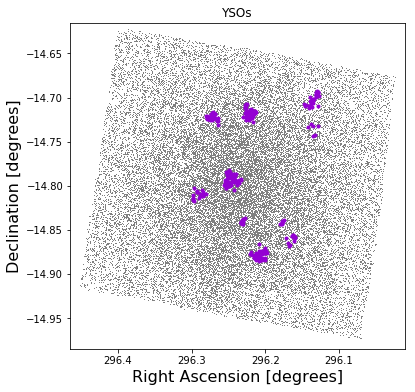

In [7]:
# 7

# This cell makes an RA vs. Dec plot of NGC 6822
# which is essentially a synthetic map of the galaxy.
#
# It includes the "RELIABLE" O-rich stars (blue),
# the "RELIABLE" C-rich stars (red), and star-forming regions.

from astropy import units as u

minRA=296.37*u.degree
maxRA=296.41*u.degree
minDec=-14.89*u.degree
maxDec=-14.86*u.degree

minRA=minRA.to(u.arcmin)
maxRA=maxRA.to(u.arcmin)
minDec=minDec.to(u.arcmin)
maxDec=maxDec.to(u.arcmin)
box_width=(maxRA-minRA)
print('Box width is',round(box_width.value,2),box_width.unit)
box_height=maxDec-minDec
print('Box height is',round(box_height.value,2),box_height.unit)
box_area=box_width*box_height
print('Box area is',round(box_area.value,2),box_area.unit)
print('')

minRA=minRA.to(u.deg)
maxRA=maxRA.to(u.deg)
minDec=minDec.to(u.deg)
maxDec=maxDec.to(u.deg)

FOV_width=0.375*u.deg
FOV_width=FOV_width.to(u.arcmin)
FOV_length=0.31*u.deg
FOV_length=FOV_length.to(u.arcmin)
FOV_area=FOV_width*FOV_length

print("Total FOV area is",round(FOV_area.value,2),FOV_area.unit)

ratio_area=FOV_area/box_area
print("The ratio of the total FOV to the box is ",round(ratio_area.value,2))
print('')

x1,y1=[maxRA.value,minRA.value],[minDec.value,minDec.value]

x2,y2=[minRA.value,minRA.value],[minDec.value,maxDec.value]

x3,y3=[minRA.value,maxRA.value],[maxDec.value,maxDec.value]

x4,y4=[maxRA.value,maxRA.value],[maxDec.value,minDec.value]
#plt.figure(figsize=(8,8))
#plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
#plt.plot(Orich.RA, Orich.Dec, '.', color='blue')
#plt.plot(Crich.RA, Crich.Dec, '.', color='red')
#plt.plot(Background.RA, Background.Dec, '.', color='orange')
#plt.plot(Unclassifiable.RA, Unclassifiable.Dec, '.', color='brown')
#plt.plot(Star.RA, Star.Dec, '.', color='green')
#plt.plot(YSO.RA, YSO.Dec, '.', color='darkviolet')

#plt.xlim(296.465, 296.01)
#plt.ylim(-14.985, -14.615)

#plt.xlabel('Right Ascension', size=12)
#plt.ylabel('Declination', size=12)

#plt.figure(figsize=(18,12))
#ax1 = plt.subplot(231)
#ax2 = plt.subplot(232)
#ax3 = plt.subplot(233)
#ax4 = plt.subplot(234)
#ax5 = plt.subplot(235)
#ax6 = plt.subplot(236)

#plt.figure(figsize=(18,6))
#ax1 = plt.subplot(131)
#ax2 = plt.subplot(132)
#ax3 = plt.subplot(133)

plt.figure(figsize=(6,6))
#ax1 = plt.subplot(121)
#ax2 = plt.subplot(122)
ax3 = plt.subplot(111)

#ax4.set_ylim(-14.985, -14.615)
#ax4.set_xlim(296.465, 296.01)
#ax4.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='gray')
#ax4.plot(Star.RA, Star.Dec, '.', color='green')
#ax4.set_xlabel('Right Ascension [degrees]', size=16)
#ax4.set_ylabel('Declination [degrees]', size=16)
#ax4.set_title('Foreground/MS Stars')
#ax4.grid(True)

#ax5.set_ylim(-14.985, -14.615)
#ax5.set_xlim(296.465, 296.01)
#ax5.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='gray')
#ax5.plot(Background.RA, Background.Dec, '.', color='orange')
#ax5.set_xlabel('Right Ascension [degrees]', size=16)
#ax5.set_ylabel('Declination [degrees]', size=16)
#ax5.set_title('Background Galaxies')
#ax5.grid(True)

#ax6.set_ylim(-14.985, -14.615)
#ax6.set_xlim(296.465, 296.01)
#ax6.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='gray')
#ax6.plot(Unclassifiable.RA, Unclassifiable.Dec, '.', color='brown')
#ax6.set_xlabel('Right Ascension [degrees]', size=16)
#ax6.set_ylabel('Declination [degrees]', size=16)
#ax6.set_title('Unclassifiable Objects')
#ax6.grid(True)

#ax1.set_ylim(-14.985, -14.615)
#ax1.set_xlim(296.465, 296.01)
#ax1.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='gray')
#ax1.plot(Orich.RA, Orich.Dec, '.', color='blue')
#ax1.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='magenta')
#ax1.set_xlabel('Right Ascension [degrees]', size=16)
#ax1.set_ylabel('Declination [degrees]', size=16)
#ax1.set_title('O-rich AGBs')
#ax1.grid(True)

#ax2.set_ylim(-14.985, -14.615)
#ax2.set_xlim(296.465, 296.01)
#ax2.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='gray')
#ax2.plot(Crich.RA, Crich.Dec, '.', color='red')
#ax2.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='cyan')
#ax2.set_xlabel('Right Ascension [degrees]', size=16)
#ax2.set_ylabel('Declination [degrees]', size=16)
#ax2.set_title('C-rich AGBs')
#ax2.grid(True)

ax3.set_ylim(-14.985, -14.615)
ax3.set_xlim(296.465, 296.01)
ax3.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='gray')
ax3.plot(YSO.RA, YSO.Dec, '.', color='darkviolet')
#ax3.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='green')
ax3.set_xlabel('Right Ascension [degrees]', size=16)
ax3.set_ylabel('Declination [degrees]', size=16)
ax3.set_title('YSOs')
#ax3.grid(True)

#plt.grid(True)
plt.show()
#plt.close()
#plt.savefig('spatdist_AGBs.pdf')

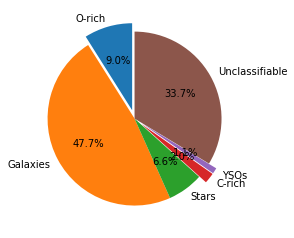

In [8]:
# 8

# How do I display the breakdown of the different stellar types
# as a function of the whole sample (n = 30,745)?

# Pie Chart: RELIABLE

labels = 'O-rich', 'Galaxies', 'Stars', 'C-rich', 'YSOs', 'Unclassifiable'#, 'Candidates', 'Else'
data_reliable = [2583, 13765, 1911, 563, 310, 9706]#, 247, 1660]
explode = (0.1, 0, 0, 0.1, 0.1, 0)#, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(data_reliable, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
#ax1=axis('equal')
plt.show()
#plt.savefig('RELIABLE1_pie_chart.pdf')

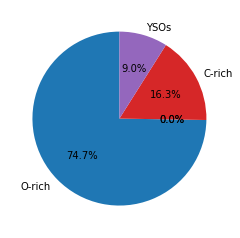

In [9]:
# 9

# Pie Chart: RELIABLE - O-rich, C-rich, YSO

labels = 'O-rich', '', '', 'C-rich', 'YSOs'
data_reliable2 = [2583, 0, 0, 563, 310]
explode = (0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(data_reliable2, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
#ax1=axis('equal')
plt.show()
#plt.savefig('RELIABLE2_pie_chart.pdf')

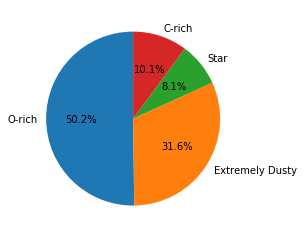

In [10]:
# 10

# Pie Chart: CANDIDATE

labels = 'O-rich', 'Extremely Dusty', 'Star', 'C-rich'
#data_candidate = [124, 84, 20, 27] # 6 Dusty and 2 C-rich were duplicates
                                    # of RELIABLE YSOs
data_candidate = [124, 78, 20, 25]
explode = (0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(data_candidate, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
#ax1=axis('equal')
plt.show()
#plt.savefig('CANDIDATE_pie_chart.pdf')

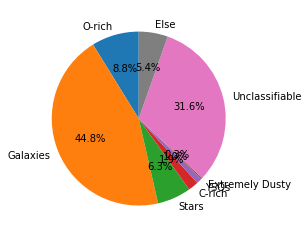

In [11]:
# 11

# Pie Chart: ALL
# NB I combined the numbers for RELIABLE and CANDIDATE sources
# which is probably not cool in the grand scheme of things

labels = 'O-rich', 'Galaxies', 'Stars', 'C-rich', 'YSOs', 'Extremely Dusty', 'Unclassifiable', 'Else'
#data_reliable = [2707, 13765, 1931, 590, 310, 84, 9706, 1660]  # 6 Dusty and 2 C-rich were
                                                                # duplicates of RELIABLE YSOs
data_reliable = [2707, 13765, 1931, 588, 310, 78, 9706, 1660]
explode = (0, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(data_reliable, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
#ax1=axis('equal')
plt.show()
#plt.savefig('ALL_pie_chart.pdf')

Box width is 2.4 arcmin
Box height is 1.8 arcmin
Box area is 4.32 arcmin2

Total FOV area is 418.5 arcmin2
The ratio of the total FOV to the box is  96.87



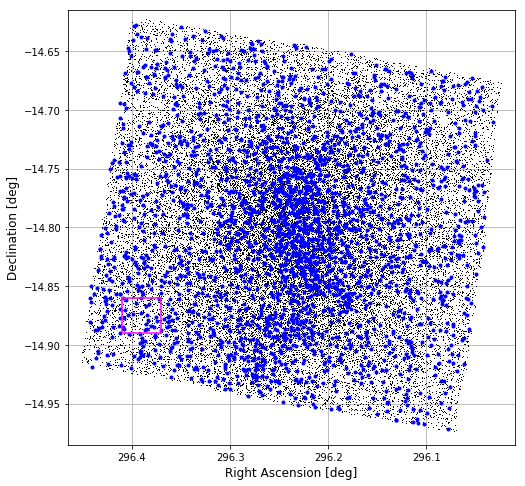

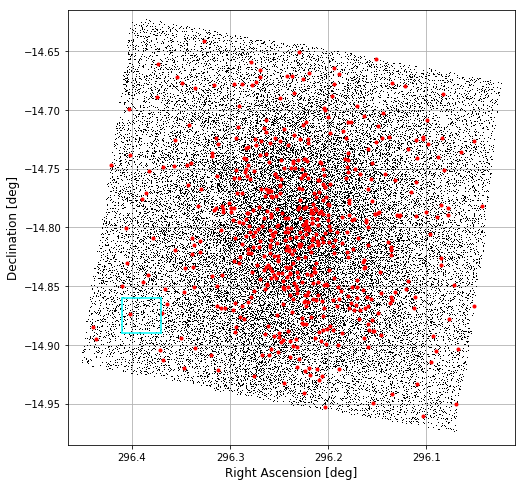

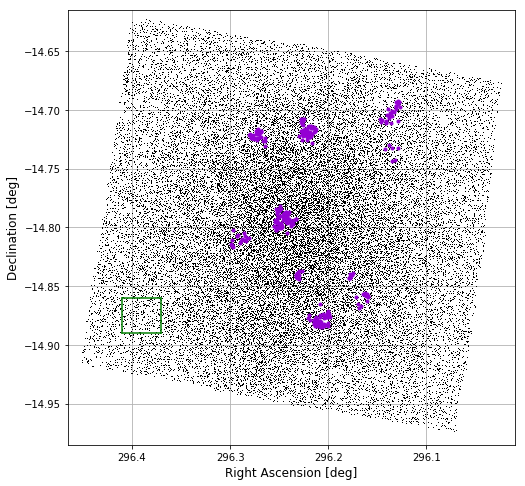

In [12]:
# 12

# Time to start figuring out the contaminants for my MASTER CATALOG.
#
# Libby sent me a string of Python code on August 3rd which she has used
# for her upcoming paper on YSOs in NGC 6822.
#
# As she describes it, the code does the following:
#
# 1) counts the YSOs found by that cut which are in the box.
# 2) Then devides this by the area of the box to give contamination per degsq.
# 3) scales this to the observed FOV;
# 4) compares to the total colour selected catalogue of YSOs to get a contamination percentage.
#
# The region Libby specifies in her code is "not completely ideal but its off the bar and
# far enough away from anything major that we know of".
#
# She also specifies that this code works to determine contamination percentage of
# ONE stellar type (in her case, YSOs), for ONE CMD, and that I would need to do run this
# for EACH stellar type (in my case, O-rich AGBs, C-rich AGBs, and YSOs)
# and for EACH of the CMDs (CMD1, CMD2, CMD3).
#
# This totals three runs of the code for each of the three CMDs, totaling *nine* times.
#
# I will copy+paste her code here and try to modify it to fit my data.

from astropy import units as u

minRA=296.37*u.degree
maxRA=296.41*u.degree
minDec=-14.89*u.degree
maxDec=-14.86*u.degree

minRA=minRA.to(u.arcmin)
maxRA=maxRA.to(u.arcmin)
minDec=minDec.to(u.arcmin)
maxDec=maxDec.to(u.arcmin)
box_width=(maxRA-minRA)
print('Box width is',round(box_width.value,2),box_width.unit)
box_height=maxDec-minDec
print('Box height is',round(box_height.value,2),box_height.unit)
box_area=box_width*box_height
print('Box area is',round(box_area.value,2),box_area.unit)
print('')

minRA=minRA.to(u.deg)
maxRA=maxRA.to(u.deg)
minDec=minDec.to(u.deg)
maxDec=maxDec.to(u.deg)

FOV_width=0.375*u.deg
FOV_width=FOV_width.to(u.arcmin)
FOV_length=0.31*u.deg
FOV_length=FOV_length.to(u.arcmin)
FOV_area=FOV_width*FOV_length

print("Total FOV area is",round(FOV_area.value,2),FOV_area.unit)

ratio_area=FOV_area/box_area
print("The ratio of the total FOV to the box is ",round(ratio_area.value,2))
print('')

x1,y1=[maxRA.value,minRA.value],[minDec.value,minDec.value]

x2,y2=[minRA.value,minRA.value],[minDec.value,maxDec.value]

x3,y3=[minRA.value,maxRA.value],[maxDec.value,maxDec.value]

x4,y4=[maxRA.value,maxRA.value],[maxDec.value,minDec.value]

#plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='black')
# Alec's note:
# This plt.plot command creates a black box which, without other context,
# just looks like a black box.
# Libby sent a screen shot which shows that, when you use this code in
# conjunction with the rest of your data, you select a small region of space
# in the lower-right corner of the synthetic galaxy map.
# It is within this box that the contamination percentages are calculated.

# "RELIABLE" O-rich

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(Orich.RA, Orich.Dec, '.', color='blue')

plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='magenta')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

# "RELIABLE" C-rich

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(Crich.RA, Crich.Dec, '.', color='red')
plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='cyan')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

# "RELIABLE" YSOs

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(YSO.RA, YSO.Dec, '.', color='darkviolet')

plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='green')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

plt.show()
plt.close()


In [13]:
# 13

# The above cell (#12) is used to define a small area in the field
# covered by the MASTERCATALOG to compute contamination for a given
# type of stellar source (O-rich AGBs, C-rich AGBs, and YSOs).
#
# The next bit of code sent to me by Libby then compares the objects
# found within that box and compares it to the whole sample,
# counting the number of "RELIABLE" sources of whatever you're comparing.
#
# It counts the total number of all sources, just the "RELIABLE" sources,
# then uses this information to compute the number of contaminants
# per square arcminute, then an average in the entire FoV, and compares with
# the color-cut-selected number of "RELIABLE" sources to give a percentage value.

# Count total number of sources in off-target box

idx_total_sources_box=np.where((MASTERCATALOG['RA']<(maxRA.value))&(MASTERCATALOG['RA']>(minRA.value))&(MASTERCATALOG['Dec']<(maxDec.value))&(MASTERCATALOG['Dec']>(minDec.value)))

num_total_sources_box=len(idx_total_sources_box[0])

print('The total number of (black and blue/red/violet) sources in the box is',num_total_sources_box)
print('')

#
# Count number of "RELIABLE" O-rich AGBs in off-target box
#

box_idx=np.where((Orich['RA']<(maxRA.value))&(Orich['RA']>(minRA.value))&(Orich['Dec']<(maxDec.value))&(Orich['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of reliable O-rich AGBs (blue) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected O-rich AGBs in the entire FOV is",str(len(Orich)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(Orich)),2),"%")
print('')

#
# Count number of "RELIABLE" C-rich AGBs in off-target box
#

box_idx=np.where((Crich['RA']<(maxRA.value))&(Crich['RA']>(minRA.value))&(Crich['Dec']<(maxDec.value))&(Crich['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of reliable C-rich AGBs (red) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected C-rich AGBs in the entire FOV is",str(len(Crich)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(Crich)),2),"%")
print('')

#
# Count number of "RELIABLE" YSOs in off-target box
#

box_idx=np.where((YSO['RA']<(maxRA.value))&(YSO['RA']>(minRA.value))&(YSO['Dec']<(maxDec.value))&(YSO['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of reliable YSOs (violet) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected YSOs in the entire FOV is",str(len(YSO)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(YSO)),2),"%")
print('')


The total number of (black and blue/red/violet) sources in the box is 212

The number of reliable O-rich AGBs (blue) in the box is 22
There are 5.09 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  2131.25
The number of colour-selected O-rich AGBs in the entire FOV is 2583
Therfore the contamination percentage is 82.51 %

The number of reliable C-rich AGBs (red) in the box is 1
There are 0.23 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  96.87
The number of colour-selected C-rich AGBs in the entire FOV is 563
Therfore the contamination percentage is 17.21 %

The number of reliable YSOs (violet) in the box is 0
There are 0.0 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  0.0
The number of colour-selected YSOs in the entire FOV is 310
Therfore the contamination percentage is 0.0 %



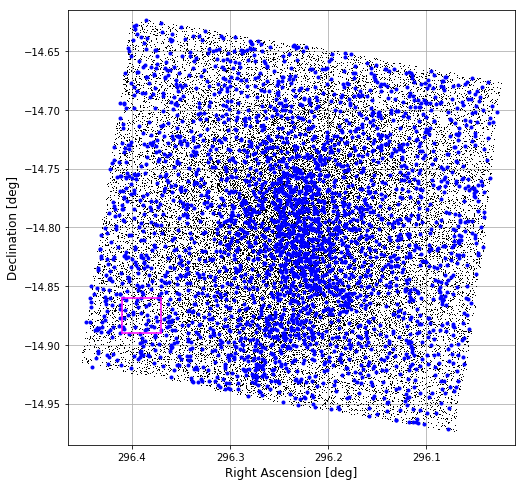

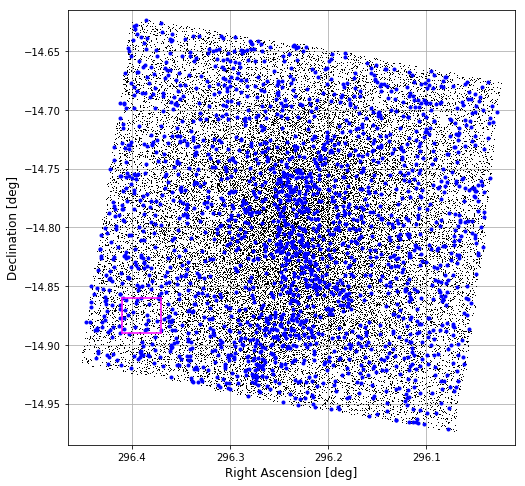

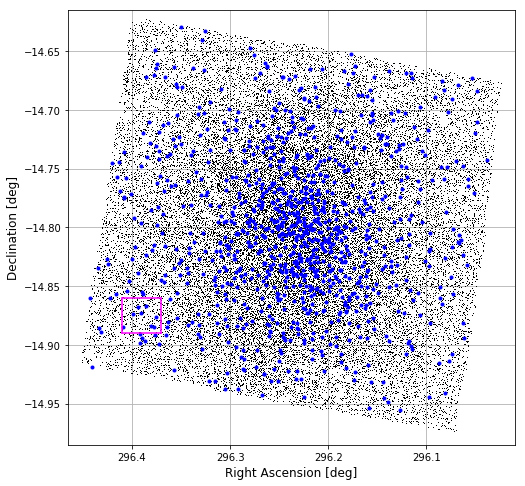

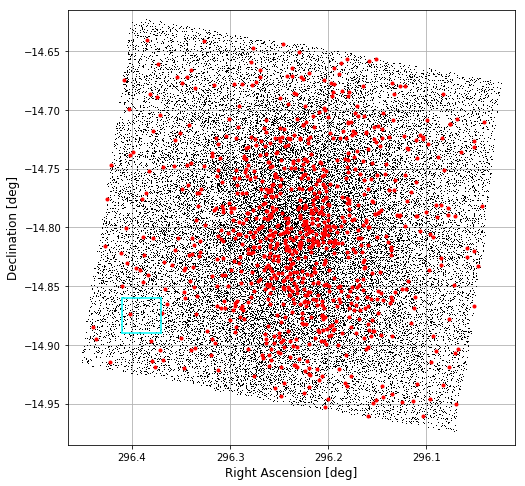

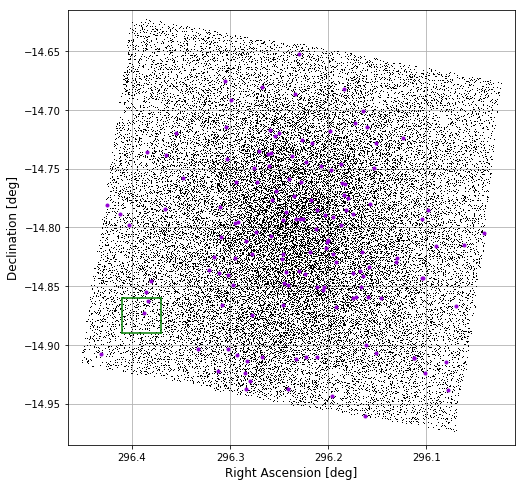

In [14]:
# 14

# The above two cells (#12 & #13) are the contamination calculations for
# ONLY the "RELIABLE" stellar type classifications.
#
# It is also useful to consider the contamination statistics for the various
# stellar type classifications as defined by each of the three daignostic CMDs
# by means of the color-cut boundaries.
#
# In this and the next cell, I'll run the same computations as for the "RELIABLE"
# set of sources, but this time for just those from CMD1 (K vs J-K).

### CMD1 O-rich (all)

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(CMD1Orichconcatdropduplicates.RA, CMD1Orichconcatdropduplicates.Dec, '.', color='blue')

plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='magenta')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

### CMD1 O-rich (not dusty)

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(CMD1Orich.RA, CMD1Orich.Dec, '.', color='blue')

plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='magenta')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

### CMD1 O-rich (dusty only)

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(CMD1Orichdusty.RA, CMD1Orichdusty.Dec, '.', color='blue')

plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='magenta')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

### CMD1 C-rich

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(CMD1Crich.RA, CMD1Crich.Dec, '.', color='red')
plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='cyan')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

### CMD1 Dusty

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(CMD1Dusty.RA, CMD1Dusty.Dec, '.', color='darkviolet')

plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='green')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

plt.show()
plt.close()


In [15]:
# 15

# Here are the contamination statistics for only those sources
# defined by the color-cut boundaries in CMD1

# Count total number of sources in off-target box

idx_total_sources_box=np.where((MASTERCATALOG['RA']<(maxRA.value))&(MASTERCATALOG['RA']>(minRA.value))&(MASTERCATALOG['Dec']<(maxDec.value))&(MASTERCATALOG['Dec']>(minDec.value)))

num_total_sources_box=len(idx_total_sources_box[0])

print('The total number of (black and blue/red/violet) sources in the box is',num_total_sources_box)
print('')

#
# Count number of CMD1 O-rich AGBs (all) in off-target box
#

box_idx=np.where((CMD1Orichconcatdropduplicates['RA']<(maxRA.value))&(CMD1Orichconcatdropduplicates['RA']>(minRA.value))&(CMD1Orichconcatdropduplicates['Dec']<(maxDec.value))&(CMD1Orichconcatdropduplicates['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of CMD1 O-rich AGBs (blue) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected O-rich AGBs in the entire FOV is",str(len(CMD1Orichconcatdropduplicates)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(CMD1Orichconcatdropduplicates)),2),"%")
print('')

#
# Count number of CMD1 O-rich AGBs (not dusty) in off-target box
#

box_idx=np.where((CMD1Orich['RA']<(maxRA.value))&(CMD1Orich['RA']>(minRA.value))&(CMD1Orich['Dec']<(maxDec.value))&(CMD1Orich['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of CMD1 O-rich AGBs (not dusty; blue) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected O-rich AGBs (not dusty) in the entire FOV is",str(len(CMD1Orich)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(CMD1Orich)),2),"%")
print('')

#
# Count number of CMD1 O-rich AGBs (dusty only) in off-target box
#

box_idx=np.where((CMD1Orichdusty['RA']<(maxRA.value))&(CMD1Orichdusty['RA']>(minRA.value))&(CMD1Orichdusty['Dec']<(maxDec.value))&(CMD1Orichdusty['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of CMD1 O-rich AGBs (dusty only; cyan) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected O-rich AGBs (dusty only) in the entire FOV is",str(len(CMD1Orichdusty)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(CMD1Orichdusty)),2),"%")
print('')

#
# Count number of CMD1 C-rich AGBs in off-target box
#

box_idx=np.where((CMD1Crich['RA']<(maxRA.value))&(CMD1Crich['RA']>(minRA.value))&(CMD1Crich['Dec']<(maxDec.value))&(CMD1Crich['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of CMD1 C-rich AGBs (red) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected C-rich AGBs in the entire FOV is",str(len(CMD1Crich)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(CMD1Crich)),2),"%")
print('')

#
# Count number of CMD1 Dusty Sources (YSOs) in off-target box
#

box_idx=np.where((CMD1Dusty['RA']<(maxRA.value))&(CMD1Dusty['RA']>(minRA.value))&(CMD1Dusty['Dec']<(maxDec.value))&(CMD1Dusty['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of CMD1 Dusty Sources (YSO; violet) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected YSOs in the entire FOV is",str(len(CMD1Dusty)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(CMD1Dusty)),2),"%")
print('')


The total number of (black and blue/red/violet) sources in the box is 212

The number of CMD1 O-rich AGBs (blue) in the box is 26
There are 6.02 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  2518.75
The number of colour-selected O-rich AGBs in the entire FOV is 3077
Therfore the contamination percentage is 81.86 %

The number of CMD1 O-rich AGBs (not dusty; blue) in the box is 18
There are 4.17 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  1743.75
The number of colour-selected O-rich AGBs (not dusty) in the entire FOV is 2075
Therfore the contamination percentage is 84.04 %

The number of CMD1 O-rich AGBs (dusty only; cyan) in the box is 8
There are 1.85 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  775.0
The number of colour-selected O-rich AGBs (dusty only) in the entire FOV is 1002
Therfore the conta

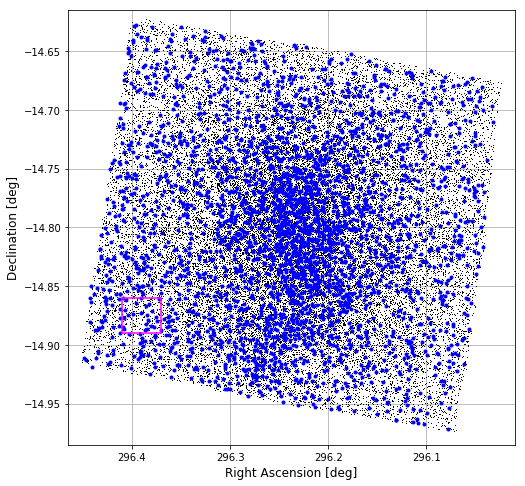

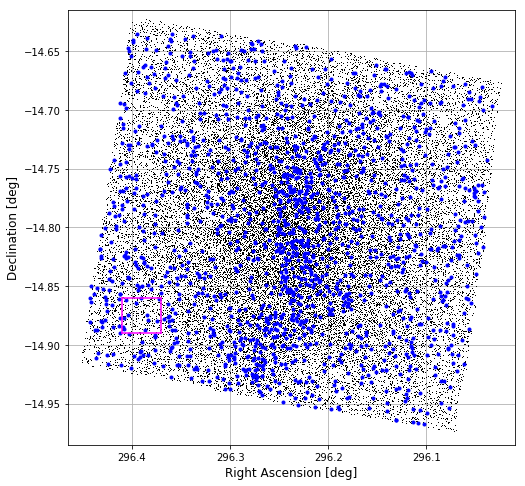

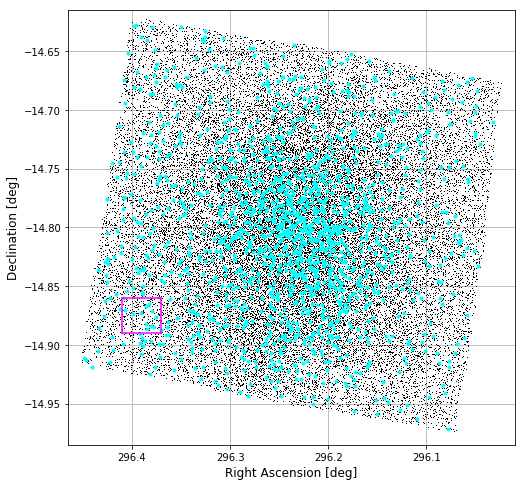

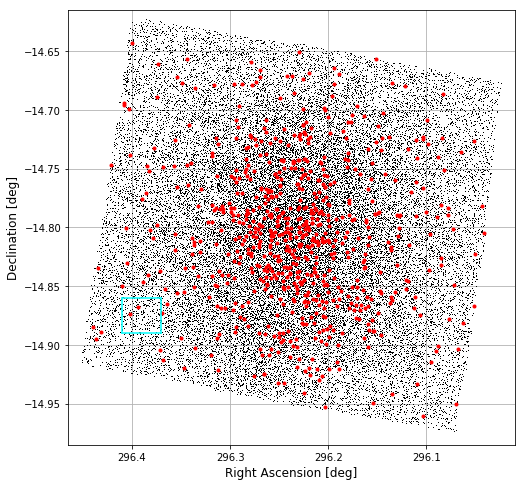

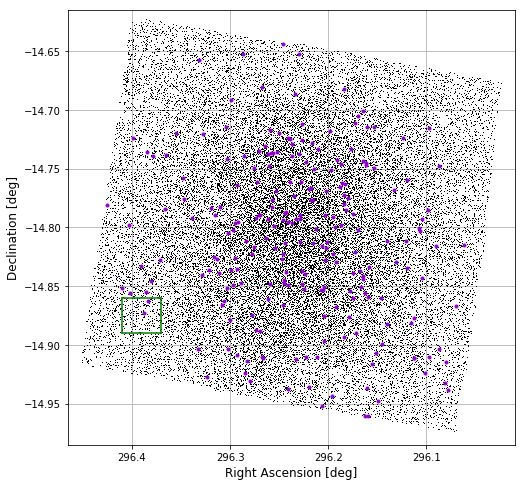

In [16]:
# 16

# The above two cells (#12 & #13) are the contamination calculations for
# ONLY the "RELIABLE" stellar type classifications.
#
# It is also useful to consider the contamination statistics for the various
# stellar type classifications as defined by each of the three daignostic CMDs
# by means of the color-cut boundaries.
#
# In this and the next cell, I'll run the same computations as for the "RELIABLE"
# set of sources, but this time for just those from CMD2 ([3.6] vs J-[3.6]).

### CMD2 O-rich (all)

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(CMD2Orichconcatdropduplicates.RA, CMD2Orichconcatdropduplicates.Dec, '.', color='blue')

plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='magenta')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

### CMD2 O-rich (not dusty)

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(CMD2Orich.RA, CMD2Orich.Dec, '.', color='blue')

plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='magenta')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

### CMD2 O-rich (dusty only)

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(CMD2Orichdusty.RA, CMD2Orichdusty.Dec, '.', color='cyan')

plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='magenta')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

### CMD2 C-rich

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(CMD2Crich.RA, CMD2Crich.Dec, '.', color='red')
plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='cyan')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

### CMD2 Dusty

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(CMD2Dusty.RA, CMD2Dusty.Dec, '.', color='darkviolet')

plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='green')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

plt.show()
plt.close()

In [17]:
# 17

# Here are the contamination statistics for only those sources
# defined by the color-cut boundaries in CMD2

# Count total number of sources in off-target box

idx_total_sources_box=np.where((MASTERCATALOG['RA']<(maxRA.value))&(MASTERCATALOG['RA']>(minRA.value))&(MASTERCATALOG['Dec']<(maxDec.value))&(MASTERCATALOG['Dec']>(minDec.value)))

num_total_sources_box=len(idx_total_sources_box[0])

print('The total number of (black and blue/red/violet) sources in the box is',num_total_sources_box)
print('')

#
# Count number of CMD2 O-rich AGBs (all) in off-target box
#

box_idx=np.where((CMD2Orichconcatdropduplicates['RA']<(maxRA.value))&(CMD2Orichconcatdropduplicates['RA']>(minRA.value))&(CMD2Orichconcatdropduplicates['Dec']<(maxDec.value))&(CMD2Orichconcatdropduplicates['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of CMD2 O-rich AGBs (blue) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected O-rich AGBs in the entire FOV is",str(len(CMD2Orichconcatdropduplicates)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(CMD2Orichconcatdropduplicates)),2),"%")
print('')

#
# Count number of CMD2 O-rich AGBs (not dusty) in off-target box
#

box_idx=np.where((CMD2Orich['RA']<(maxRA.value))&(CMD2Orich['RA']>(minRA.value))&(CMD2Orich['Dec']<(maxDec.value))&(CMD2Orich['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of CMD2 O-rich AGBs (not dusty; blue) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected O-rich AGBs (not dusty) in the entire FOV is",str(len(CMD2Orich)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(CMD2Orich)),2),"%")
print('')

#
# Count number of CMD2 O-rich AGBs (dusty only) in off-target box
#

box_idx=np.where((CMD2Orichdusty['RA']<(maxRA.value))&(CMD2Orichdusty['RA']>(minRA.value))&(CMD2Orichdusty['Dec']<(maxDec.value))&(CMD2Orichdusty['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of CMD2 O-rich AGBs (dusty only; cyan) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected O-rich AGBs (dusty only) in the entire FOV is",str(len(CMD2Orichdusty)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(CMD2Orichdusty)),2),"%")
print('')

#
# Count number of CMD2 C-rich AGBs in off-target box
#

box_idx=np.where((CMD2Crich['RA']<(maxRA.value))&(CMD2Crich['RA']>(minRA.value))&(CMD2Crich['Dec']<(maxDec.value))&(CMD2Crich['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of CMD2 C-rich AGBs (red) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected C-rich AGBs in the entire FOV is",str(len(CMD2Crich)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(CMD2Crich)),2),"%")
print('')

#
# Count number of CMD2 Dusty Sources (YSOs) in off-target box
#

box_idx=np.where((CMD2Dusty['RA']<(maxRA.value))&(CMD2Dusty['RA']>(minRA.value))&(CMD2Dusty['Dec']<(maxDec.value))&(CMD2Dusty['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of CMD2 Dusty Sources (YSO; violet) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected YSOs in the entire FOV is",str(len(CMD2Dusty)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(CMD2Dusty)),2),"%")
print('')


The total number of (black and blue/red/violet) sources in the box is 212

The number of CMD2 O-rich AGBs (blue) in the box is 23
There are 5.32 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  2228.12
The number of colour-selected O-rich AGBs in the entire FOV is 3116
Therfore the contamination percentage is 71.51 %

The number of CMD2 O-rich AGBs (not dusty; blue) in the box is 12
There are 2.78 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  1162.5
The number of colour-selected O-rich AGBs (not dusty) in the entire FOV is 1571
Therfore the contamination percentage is 74.0 %

The number of CMD2 O-rich AGBs (dusty only; cyan) in the box is 11
There are 2.55 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  1065.62
The number of colour-selected O-rich AGBs (dusty only) in the entire FOV is 1545
Therfore the cont

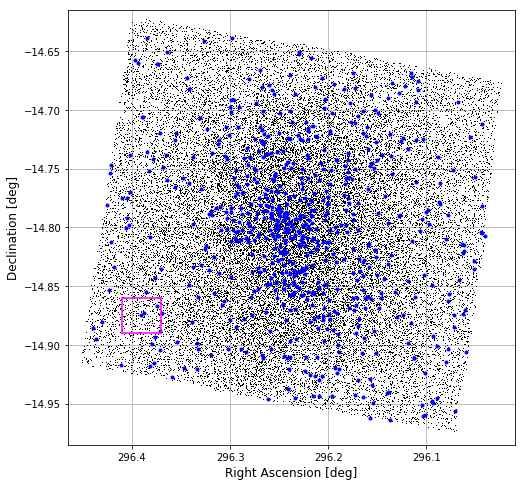

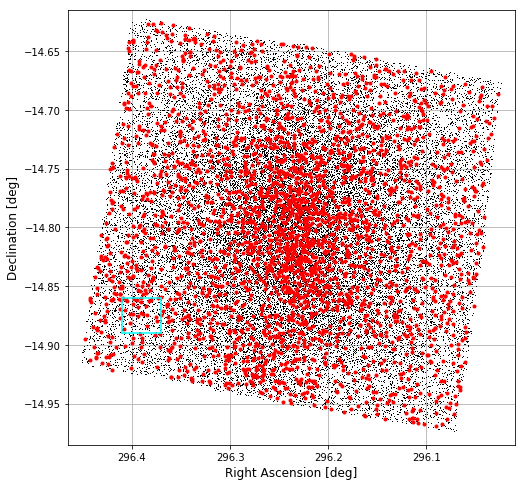

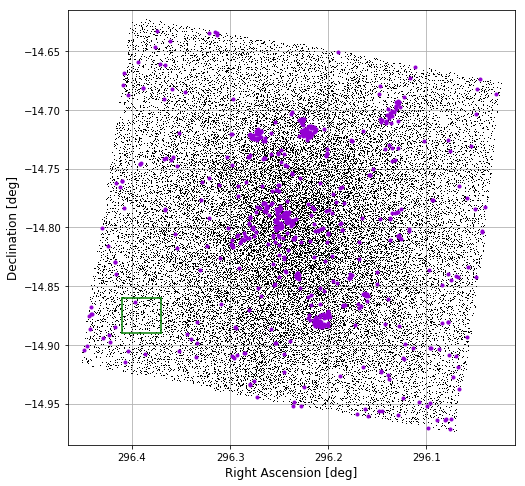

In [18]:
# 18

# The above two cells (#12 & #13) are the contamination calculations for
# ONLY the "RELIABLE" stellar type classifications.
#
# It is also useful to consider the contamination statistics for the various
# stellar type classifications as defined by each of the three daignostic CMDs
# by means of the color-cut boundaries.
#
# In this and the next cell, I'll run the same computations as for the "RELIABLE"
# set of sources, but this time for just those from CMD3 ([8.0] vs [3.6]-[8.0]).

### CMD3 O-rich

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(CMD3Orich.RA, CMD3Orich.Dec, '.', color='blue')

plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='magenta')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

### CMD3 C-rich

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(CMD3Crich.RA, CMD3Crich.Dec, '.', color='red')
plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='cyan')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

### CMD3 Dusty

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(CMD3Dusty.RA, CMD3Dusty.Dec, '.', color='darkviolet')

plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='green')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

plt.show()
plt.close()


In [19]:
# 19

# Here are the contamination statistics for only those sources
# defined by the color-cut boundaries in CMD3

# Count total number of sources in off-target box

idx_total_sources_box=np.where((MASTERCATALOG['RA']<(maxRA.value))&(MASTERCATALOG['RA']>(minRA.value))&(MASTERCATALOG['Dec']<(maxDec.value))&(MASTERCATALOG['Dec']>(minDec.value)))

num_total_sources_box=len(idx_total_sources_box[0])

print('The total number of (black and blue/red/violet) sources in the box is',num_total_sources_box)
print('')

#
# Count number of CMD3 O-rich AGBs in off-target box
#

box_idx=np.where((CMD3Orich['RA']<(maxRA.value))&(CMD3Orich['RA']>(minRA.value))&(CMD3Orich['Dec']<(maxDec.value))&(CMD3Orich['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of CMD3 O-rich AGBs (blue) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected O-rich AGBs in the entire FOV is",str(len(CMD3Orich)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(CMD3Orich)),2),"%")
print('')

#
# Count number of CMD3 C-rich AGBs in off-target box
#

box_idx=np.where((CMD3Crich['RA']<(maxRA.value))&(CMD3Crich['RA']>(minRA.value))&(CMD3Crich['Dec']<(maxDec.value))&(CMD3Crich['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of CMD3 C-rich AGBs (red) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected C-rich AGBs in the entire FOV is",str(len(CMD3Crich)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(CMD3Crich)),2),"%")
print('')

#
# Count number of CMD3 Dusty Sources (YSOs) in off-target box
#

box_idx=np.where((CMD3Dusty['RA']<(maxRA.value))&(CMD3Dusty['RA']>(minRA.value))&(CMD3Dusty['Dec']<(maxDec.value))&(CMD3Dusty['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of CMD3 Dusty Sources (YSO; violet) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected YSOs in the entire FOV is",str(len(CMD3Dusty)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(CMD3Dusty)),2),"%")
print('')


The total number of (black and blue/red/violet) sources in the box is 212

The number of CMD3 O-rich AGBs (blue) in the box is 4
There are 0.93 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  387.5
The number of colour-selected O-rich AGBs in the entire FOV is 674
Therfore the contamination percentage is 57.49 %

The number of CMD3 C-rich AGBs (red) in the box is 25
There are 5.79 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  2421.87
The number of colour-selected C-rich AGBs in the entire FOV is 2949
Therfore the contamination percentage is 82.13 %

The number of CMD3 Dusty Sources (YSO; violet) in the box is 1
There are 0.23 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  96.87
The number of colour-selected YSOs in the entire FOV is 630
Therfore the contamination percentage is 15.38 %



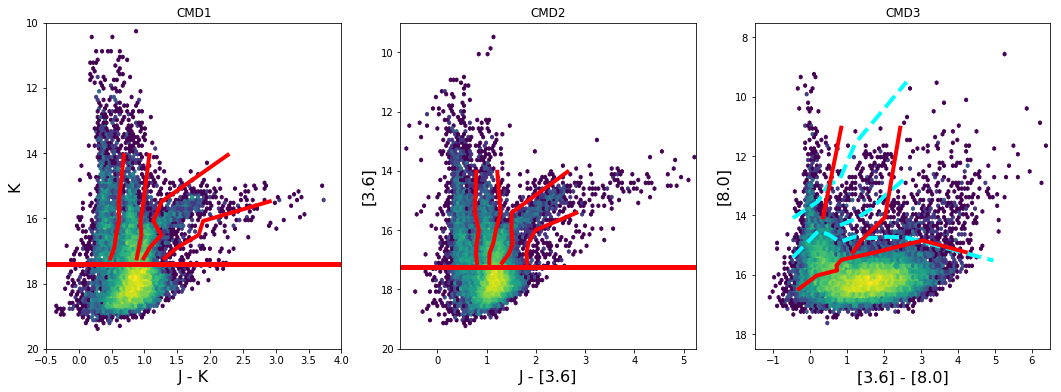

In [57]:
# 20

plt.figure(figsize=(18,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.set_xlim(-0.5, 4.0)
ax1.set_ylim(20.0, 10.0)
im1 = ax1.hexbin(jMINUSkDATA.jMINUSk, jMINUSkDATA.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 4.0, 20.0, 10.0))
ax1.set_xlabel('J - K', size=16)
ax1.set_ylabel('K', size=16)
#cb = plt.colorbar(im1, label='log(N)')

yvalues1 = np.array([17.226, 16.886, 16.511, 16.081, 15.481, 14.058])
yvalues2 = np.array([17.226, 16.886, 16.511, 16.081, 15.481, 14.058])
yvalues3 = np.array([17.226, 16.886, 16.511, 16.081, 15.481, 14.058])
yvalues4 = np.array([17.226, 16.886, 16.511, 16.081, 15.481])
boundary1 = np.array([0.483, 0.543, 0.569, 0.612, 0.612, 0.688])
boundary2 = np.array([0.883, 0.918, 0.954, 0.940, 0.986, 1.075])
boundary3 = np.array([0.988, 1.084, 1.256, 1.136, 1.264, 2.269])
boundary4 = np.array([1.305, 1.506, 1.826, 1.894, 2.910])

ax1.plot(boundary1, yvalues1, linewidth=4.0, color='red')
ax1.plot(boundary2, yvalues2, linewidth=4.0, color='red')
ax1.plot(boundary3, yvalues3, linewidth=4.0, color='red')
ax1.plot(boundary4, yvalues4, linewidth=4.0, color='red')
ax1.axhline(y=17.386, linewidth=5.0, color='red') # TRGB threshold

ax1.set_title('CMD1')
#ax1.grid(True)

ax2.set_xlim(-0.75, 5.25)
ax2.set_ylim(20.0, 9.0)
im1 = ax2.hexbin(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.75, 5.25, 20.0, 9.0))
ax2.set_xlabel('J - [3.6]', size=16)
ax2.set_ylabel('[3.6]', size=16)

yvalues1 = np.array([17.103, 16.789, 16.424, 15.999, 15.414, 14.032])
yvalues2 = np.array([17.103, 16.789, 16.424, 15.999, 15.414, 14.032])
yvalues3 = np.array([17.103, 16.789, 16.424, 15.999, 15.414, 14.032])
yvalues4 = np.array([17.103, 16.789, 16.424, 15.999, 15.414])
boundary1 = np.array([0.805, 0.785, 0.799, 0.843, 0.763, 0.789])
boundary2 = np.array([1.055, 1.059, 1.138, 1.1885, 1.282, 1.217])
boundary3 = np.array([1.312, 1.456, 1.530, 1.505, 1.506, 2.641])
boundary4 = np.array([1.826, 1.808, 1.850, 1.992, 2.825])

ax2.plot(boundary1, yvalues1, linewidth=4.0, color='red')
ax2.plot(boundary2, yvalues2, linewidth=4.0, color='red')
ax2.plot(boundary3, yvalues3, linewidth=4.0, color='red')
ax2.plot(boundary4, yvalues4, linewidth=4.0, color='red')

ax2.axhline(y=17.243, linewidth=5.0, color='red') # TRGB threshold

ax2.set_title('CMD2')
#ax2.grid(True)

ax3.set_xlim(-1.5, 6.5)
ax3.set_ylim(18.5, 7.5)
im1 = ax3.hexbin(threesixMINUSeightzeroDATA.threesixMINUSeightzero, threesixMINUSeightzeroDATA.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 6.5, 18.5, 7.5))
ax3.set_xlabel('[3.6] - [8.0]', size=16)
ax3.set_ylabel('[8.0]', size=16)
ax3.set_title('CMD3')

yvalues1 = np.array([16.480, 16.030, 15.855, 15.690, 15.500, 15.240, 14.845, 15.240])#, 14.060])#, 11.045])
yvalues2 = np.array([15.240, 14.845, 14.060, 11.045])
yvalues3 = np.array([14.060, 11.045])
boundary1 = np.array([0.778, 1.122, 1.243, 1.216, 1.564, 1.790, 3.037, 4.206])#, 2.435])
boundary1 = np.array([-0.313, 0.173, 0.725, 0.712, 0.843, 1.790, 3.037, 4.206])#, 2.435])
boundary2 = np.array([1.154, 1.380, 2.024, 2.435])
boundary3 = np.array([0.343, 0.837])


xvaluesA = np.array([-0.475, 0.205, 0.475, 0.805, 1.215, 2.605])#, 4.96])
xvaluesB = np.array([-0.475, 0.205, 0.475, 0.805, 1.215, 1.635, 2.055, 2.605, 4.96])
xvaluesC = np.array([0.805, 1.215, 1.635, 2.055, 2.605])#, 4.96])
boundaryA = np.array([14.093, 13.535, 12.994, 12.764, 11.573, 9.5])
boundaryB = np.array([15.419, 14.541, 14.633, 14.892, 14.717, 14.768, 14.721, 14.749, 15.524])
boundaryC = np.array([14.336, 14.116, 13.796, 13.294, 12.714])#, 1.256, 1.136, 1.264, 2.269])

ax3.plot(xvaluesA, boundaryA, linewidth=4.0, color='cyan', linestyle='dashed')
ax3.plot(xvaluesB, boundaryB, linewidth=4.0, color='cyan', linestyle='dashed')
ax3.plot(xvaluesC, boundaryC, linewidth=4.0, color='cyan', linestyle='dashed')
ax3.plot(boundary1, yvalues1, linewidth=4.0, color='red')
ax3.plot(boundary2, yvalues2, linewidth=4.0, color='red')
ax3.plot(boundary3, yvalues3, linewidth=4.0, color='red')

#ax3.grid(True)

#plt.savefig('all_hist.pdf')

Text(0.5, 1.0, 'CMD3')

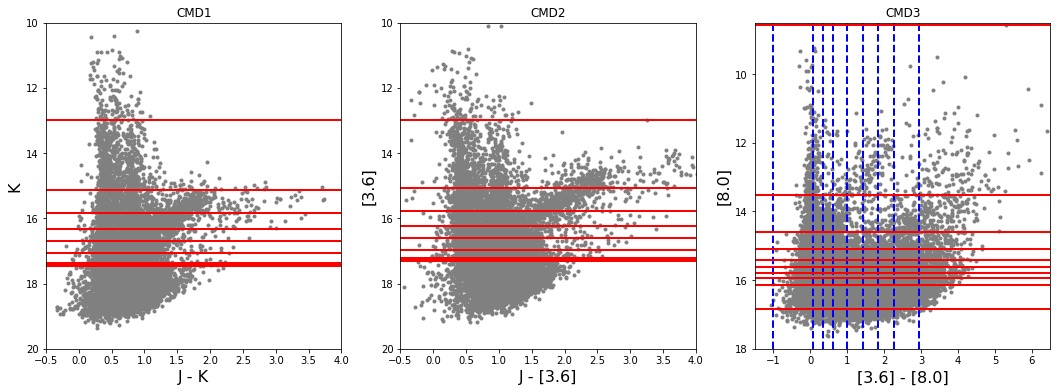

In [43]:
# 21

plt.figure(figsize=(18,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.plot(jMINUSkDATA.jMINUSk, jMINUSkDATA.Kmag, '.', color='gray')
ax1.set_xlim(-0.5, 4.0)
ax1.set_ylim(20.0, 10.0)
ax1.set_xlabel('J - K', size=16)
ax1.set_ylabel('K', size=16)
ax1.axhline(y=17.386, linewidth=2.0, color='red')
ax1.axhline(y=17.066, linewidth=2.0, color='red')
ax1.axhline(y=16.706, linewidth=2.0, color='red')
ax1.axhline(y=16.316, linewidth=2.0, color='red')
ax1.axhline(y=15.846, linewidth=2.0, color='red')
ax1.axhline(y=15.116, linewidth=2.0, color='red')
ax1.axhline(y=13.000, linewidth=2.0, color='red')
ax1.axhline(y=17.386, linewidth=5.0, color='red') # TRGB threshold
ax1.set_title('CMD1')
#ax1.grid(True)

ax2.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, '.', color='gray')
ax2.set_xlim(-0.5, 4.0)
ax2.set_ylim(20.0, 10.0)
ax2.set_xlabel('J - [3.6]', size=16)
ax2.set_ylabel('[3.6]', size=16)
ax2.axhline(y=17.243, linewidth=2.0, color='red')
ax2.axhline(y=16.963, linewidth=2.0, color='red')
ax2.axhline(y=16.614, linewidth=2.0, color='red')
ax2.axhline(y=16.234, linewidth=2.0, color='red')
ax2.axhline(y=15.764, linewidth=2.0, color='red')
ax2.axhline(y=15.064, linewidth=2.0, color='red')
ax2.axhline(y=13.000, linewidth=2.0, color='red')
ax2.axhline(y=17.243, linewidth=5.0, color='red') # TRGB threshold
ax2.set_title('CMD2')
#ax2.grid(True)

ax3.plot(threesixMINUSeightzeroDATA.threesixMINUSeightzero, threesixMINUSeightzeroDATA.k80mag, '.', color='gray')
ax3.set_xlim(-1.5, 6.5)
ax3.set_ylim(18.0, 8.5)
ax3.set_xlabel('[3.6] - [8.0]', size=16)
ax3.set_ylabel('[8.0]', size=16)

ax3.axvline(x=-1.02, linewidth=2.0, color='blue', linestyle='dashed')
ax3.axvline(x=0.071, linewidth=2.0, color='blue', linestyle='dashed')
ax3.axvline(x=0.331, linewidth=2.0, color='blue', linestyle='dashed')
ax3.axvline(x=0.611, linewidth=2.0, color='blue', linestyle='dashed')
ax3.axvline(x=0.991, linewidth=2.0, color='blue', linestyle='dashed')
ax3.axvline(x=1.431, linewidth=2.0, color='blue', linestyle='dashed')
ax3.axvline(x=1.831, linewidth=2.0, color='blue', linestyle='dashed')
ax3.axvline(x=2.271, linewidth=2.0, color='blue', linestyle='dashed')
ax3.axvline(x=2.931, linewidth=2.0, color='blue', linestyle='dashed')
ax3.axvline(x=6.98, linewidth=2.0, color='blue', linestyle='dashed')

ax3.axhline(y=16.83, linewidth=2.0, color='red')#, linestyle='dashed')
ax3.axhline(y=16.129, linewidth=2.0, color='red')#, linestyle='dashed')
ax3.axhline(y=15.939, linewidth=2.0, color='red')#, linestyle='dashed')
ax3.axhline(y=15.779, linewidth=2.0, color='red')#, linestyle='dashed')
ax3.axhline(y=15.609, linewidth=2.0, color='red')#, linestyle='dashed')
ax3.axhline(y=15.399, linewidth=2.0, color='red')#, linestyle='dashed')
ax3.axhline(y=15.089, linewidth=2.0, color='red')#, linestyle='dashed')
ax3.axhline(y=14.609, linewidth=2.0, color='red')#, linestyle='dashed')
ax3.axhline(y=13.519, linewidth=2.0, color='red')#, linestyle='dashed')
ax3.axhline(y=8.58, linewidth=2.0, color='red')#, linestyle='dashed')

ax3.set_title('CMD3')

#ax3.grid(True)

#plt.savefig('all_bins.pdf')

Text(0.5, 1.0, 'CMD3')

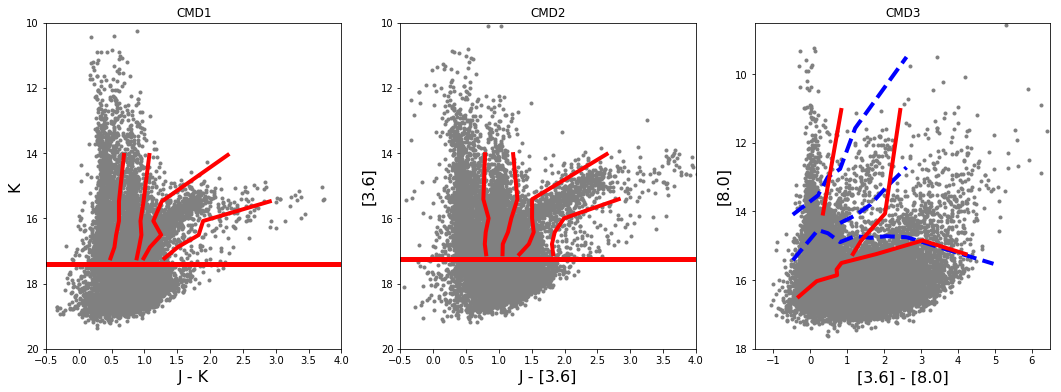

In [45]:
# 22

plt.figure(figsize=(18,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.plot(jMINUSkDATA.jMINUSk, jMINUSkDATA.Kmag, '.', color='gray')
ax1.set_xlim(-0.5, 4.0)
ax1.set_ylim(20.0, 10.0)
ax1.set_xlabel('J - K', size=16)
ax1.set_ylabel('K', size=16)

yvalues1 = np.array([17.226, 16.886, 16.511, 16.081, 15.481, 14.058])
yvalues2 = np.array([17.226, 16.886, 16.511, 16.081, 15.481, 14.058])
yvalues3 = np.array([17.226, 16.886, 16.511, 16.081, 15.481, 14.058])
yvalues4 = np.array([17.226, 16.886, 16.511, 16.081, 15.481])
boundary1 = np.array([0.483, 0.543, 0.569, 0.612, 0.612, 0.688])
boundary2 = np.array([0.883, 0.918, 0.954, 0.940, 0.986, 1.075])
boundary3 = np.array([0.988, 1.084, 1.256, 1.136, 1.264, 2.269])
boundary4 = np.array([1.305, 1.506, 1.826, 1.894, 2.910])

ax1.plot(boundary1, yvalues1, linewidth=4.0, color='red')
ax1.plot(boundary2, yvalues2, linewidth=4.0, color='red')
ax1.plot(boundary3, yvalues3, linewidth=4.0, color='red')
ax1.plot(boundary4, yvalues4, linewidth=4.0, color='red')
ax1.axhline(y=17.386, linewidth=5.0, color='red') # TRGB threshold

ax1.set_title('CMD1')
#ax1.grid(True)

ax2.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, '.', color='gray')
ax2.set_xlim(-0.5, 4.0)
ax2.set_ylim(20.0, 10.0)
ax2.set_xlabel('J - [3.6]', size=16)
ax2.set_ylabel('[3.6]', size=16)

yvalues1 = np.array([17.103, 16.789, 16.424, 15.999, 15.414, 14.032])
yvalues2 = np.array([17.103, 16.789, 16.424, 15.999, 15.414, 14.032])
yvalues3 = np.array([17.103, 16.789, 16.424, 15.999, 15.414, 14.032])
yvalues4 = np.array([17.103, 16.789, 16.424, 15.999, 15.414])
boundary1 = np.array([0.805, 0.785, 0.799, 0.843, 0.763, 0.789])
boundary2 = np.array([1.055, 1.059, 1.138, 1.1885, 1.282, 1.217])
boundary3 = np.array([1.312, 1.456, 1.530, 1.505, 1.506, 2.641])
boundary4 = np.array([1.826, 1.808, 1.850, 1.992, 2.825])

ax2.plot(boundary1, yvalues1, linewidth=4.0, color='red')
ax2.plot(boundary2, yvalues2, linewidth=4.0, color='red')
ax2.plot(boundary3, yvalues3, linewidth=4.0, color='red')
ax2.plot(boundary4, yvalues4, linewidth=4.0, color='red')

ax2.axhline(y=17.243, linewidth=5.0, color='red') # TRGB threshold

ax2.set_title('CMD2')
#ax2.grid(True)

ax3.plot(threesixMINUSeightzeroDATA.threesixMINUSeightzero, threesixMINUSeightzeroDATA.k80mag, '.', color='gray')
ax3.set_xlim(-1.5, 6.5)
ax3.set_ylim(18.0, 8.5)
ax3.set_xlabel('[3.6] - [8.0]', size=16)
ax3.set_ylabel('[8.0]', size=16)

yvalues1 = np.array([16.480, 16.030, 15.855, 15.690, 15.500, 15.240, 14.845, 15.240])#, 14.060])#, 11.045])
yvalues2 = np.array([15.240, 14.845, 14.060, 11.045])
yvalues3 = np.array([14.060, 11.045])
boundary1 = np.array([0.778, 1.122, 1.243, 1.216, 1.564, 1.790, 3.037, 4.206])#, 2.435])
boundary1 = np.array([-0.313, 0.173, 0.725, 0.712, 0.843, 1.790, 3.037, 4.206])#, 2.435])
boundary2 = np.array([1.154, 1.380, 2.024, 2.435])
boundary3 = np.array([0.343, 0.837])


xvaluesA = np.array([-0.475, 0.205, 0.475, 0.805, 1.215, 2.605])#, 4.96])
xvaluesB = np.array([-0.475, 0.205, 0.475, 0.805, 1.215, 1.635, 2.055, 2.605, 4.96])
xvaluesC = np.array([0.805, 1.215, 1.635, 2.055, 2.605])#, 4.96])
boundaryA = np.array([14.093, 13.535, 12.994, 12.764, 11.573, 9.5])
boundaryB = np.array([15.419, 14.541, 14.633, 14.892, 14.717, 14.768, 14.721, 14.749, 15.524])
boundaryC = np.array([14.336, 14.116, 13.796, 13.294, 12.714])#, 1.256, 1.136, 1.264, 2.269])

ax3.plot(xvaluesA, boundaryA, linewidth=4.0, color='blue', linestyle='dashed')
ax3.plot(xvaluesB, boundaryB, linewidth=4.0, color='blue', linestyle='dashed')
ax3.plot(xvaluesC, boundaryC, linewidth=4.0, color='blue', linestyle='dashed')
ax3.plot(boundary1, yvalues1, linewidth=4.0, color='red')
ax3.plot(boundary2, yvalues2, linewidth=4.0, color='red')
ax3.plot(boundary3, yvalues3, linewidth=4.0, color='red')

ax3.set_title('CMD3')
#ax3.grid(True)

#plt.savefig('all_squiggles.pdf')

Text(0.5, 1.0, 'CMD3')

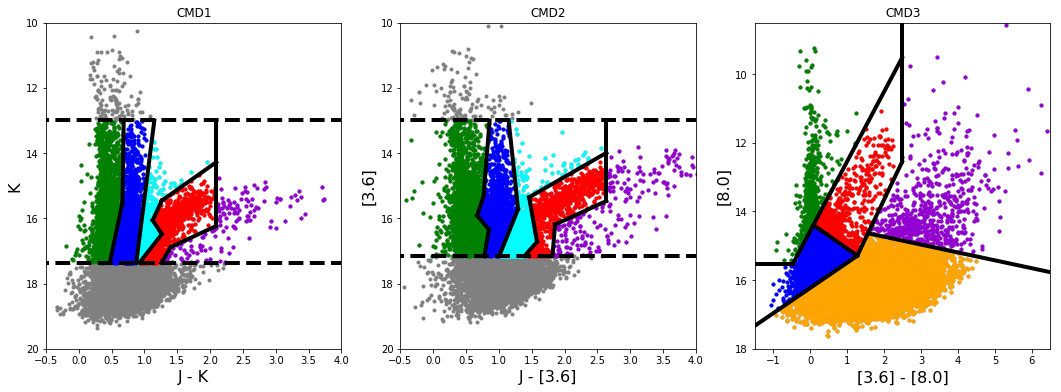

In [47]:
# 23

plt.figure(figsize=(18,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

CMD1_region1 = pd.read_csv('CMD1_region1.csv')
CMD1_region2 = pd.read_csv('CMD1_region2.csv')
CMD1_region3 = pd.read_csv('CMD1_region3.csv')
CMD1_region4 = pd.read_csv('CMD1_region4.csv')
CMD1_region5 = pd.read_csv('CMD1_region5.csv')

ax1.plot(jMINUSkDATA.jMINUSk, jMINUSkDATA.Kmag, '.', color='gray')
ax1.set_xlim(-0.5, 4.0)
ax1.set_ylim(20.0, 10.0)
ax1.set_xlabel('J - K', size=16)
ax1.set_ylabel('K', size=16)

ax1.plot(CMD1_region1.jMINUSk, CMD1_region1.Kmag, '.', color='green')
ax1.plot(CMD1_region2.jMINUSk, CMD1_region2.Kmag, '.', color='blue')
ax1.plot(CMD1_region3.jMINUSk, CMD1_region3.Kmag, '.', color='cyan')
ax1.plot(CMD1_region4.jMINUSk, CMD1_region4.Kmag, '.', color='red')
ax1.plot(CMD1_region5.jMINUSk, CMD1_region5.Kmag, '.', color='darkviolet')

##########

# TRGB limit
#
x_TRGB = np.linspace(-1.0, 5.0, 100)
y_TRGB = 0.0*x_TRGB + 17.363

# brightness limit
#
x_bright = np.linspace(-1.0, 5.0, 100)
y_bright = 0.0*x_bright + 13.0

# dusty limit
#
extremely_dusty = 2.094 # from previous analysis

# Boundary 1
#
x_Boundary1a = np.linspace(0.472405, 0.6645054400355514, 100)
y_Boundary1a = -9.586324539372798*x_Boundary1a + 21.891625841797612

x_Boundary1b = np.linspace(0.6645054400355514, 0.684156, 100)
y_Boundary1b = -128.3181818181806*x_Boundary1b + 100.78959090909008

# Boundary 2
#
x_Boundary2a = np.linspace(0.876058, 1.15081, 100)
y_Boundary2a = -15.87998315922431*x_Boundary2a + 31.2747871549615

# Boundary 3
#
x_Boundary3a = np.linspace(0.923449, 1.265152057299042, 100)
y_Boundary3a = -2.568378861900523*x_Boundary3a + 19.734766668960322

x_Boundary3b = np.linspace(1.265152057299042, 1.126999999999999, 100)
y_Boundary3b = 3.0935251798560923*x_Boundary3b + 12.57159712230218

x_Boundary3c = np.linspace(1.126999999999999, 1.263999999999998, 100)
y_Boundary3c = -4.379562043795606*x_Boundary3c + 20.99376642335764

x_Boundary3d = np.linspace(1.263999999999998, 2.094, 100)
y_Boundary3d = -1.420020120724346*x_Boundary3d + 17.252905432595572

# Boundary 4
#
x_Boundary4a = np.linspace(1.25653, 1.403133055550219, 100)
y_Boundary4a = -3.3009708737863668*x_Boundary4a + 21.510766990291202

x_Boundary4b = np.linspace(1.403133055550219, 2.094, 100)
y_Boundary4b = -0.9336714193622097*x_Boundary4b + 18.189130873402668

# plot lines
#
ax1.plot(x_TRGB, y_TRGB, '--', linewidth=4.0, color='black')
ax1.plot(x_bright, y_bright, '--', linewidth=4.0, color='black')

ax1.plot(x_Boundary1a, y_Boundary1a, linewidth=4.0, color='black')
ax1.plot(x_Boundary1b, y_Boundary1b, linewidth=4.0, color='black')

ax1.plot(x_Boundary2a, y_Boundary2a, linewidth=4.0, color='black')

ax1.plot(x_Boundary3a, y_Boundary3a, linewidth=4.0, color='black')
ax1.plot(x_Boundary3b, y_Boundary3b, linewidth=4.0, color='black')
ax1.plot(x_Boundary3c, y_Boundary3c, linewidth=4.0, color='black')
ax1.plot(x_Boundary3d, y_Boundary3d, linewidth=4.0, color='black')

ax1.plot(x_Boundary4a, y_Boundary4a, linewidth=4.0, color='black')
ax1.plot(x_Boundary4b, y_Boundary4b, linewidth=4.0, color='black')

y_extremely_dusty = np.linspace(16.234, 13.0, 100)
x_extremely_dusty = 0.0*y_extremely_dusty + extremely_dusty
ax1.plot(x_extremely_dusty, y_extremely_dusty, linewidth=4.0, color='black')

ax1.set_title('CMD1')
#ax1.grid(True)

##########

CMD2_region1 = pd.read_csv('CMD2_region1.csv')
CMD2_region2 = pd.read_csv('CMD2_region2.csv')
CMD2_region3 = pd.read_csv('CMD2_region3.csv')
CMD2_region4 = pd.read_csv('CMD2_region4.csv')
CMD2_region5 = pd.read_csv('CMD2_region5.csv')

ax2.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, '.', color='gray')
ax2.set_xlim(-0.5, 4.0)
ax2.set_ylim(20.0, 10.0)
ax2.set_xlabel('J - [3.6]', size=16)
ax2.set_ylabel('[3.6]', size=16)

ax2.plot(CMD2_region1.jMINUSthreesix, CMD2_region1.k36mag, '.', color='green')
ax2.plot(CMD2_region2.jMINUSthreesix, CMD2_region2.k36mag, '.', color='blue')
ax2.plot(CMD2_region3.jMINUSthreesix, CMD2_region3.k36mag, '.', color='cyan')
ax2.plot(CMD2_region4.jMINUSthreesix, CMD2_region4.k36mag, '.', color='red')
ax2.plot(CMD2_region5.jMINUSthreesix, CMD2_region5.k36mag, '.', color='darkviolet')

##########

# TRGB limit
#
x_TRGB = np.linspace(-1.0, 5.0, 100)
y_TRGB = 0.0*x_TRGB + 17.155

# brightness limit
#
x_bright = np.linspace(-1.0, 5.0, 100)
y_bright = 0.0*x_bright + 13.0

# dusty limit
#
extremely_dusty = 2.637 # from previous analysis

# Boundary 1
#
x_Boundary1a = np.linspace(0.778628, 0.84664682587104931, 100)
y_Boundary1a = -12.032798489853775*x_Boundary1a + 26.524075035394123

x_Boundary1b = np.linspace(0.84664682587104931, 0.6679999999999977, 100)
y_Boundary1b = 2.3876404494382073*x_Boundary1b + 14.315056179775285

x_Boundary1c = np.linspace(0.6679999999999977, 0.7659999999999997, 100)
y_Boundary1c = -5.969387755102038*x_Boundary1c + 19.89755102040815

x_Boundary1d = np.linspace(0.7659999999999997, 0.858131, 100)
y_Boundary1d = -25.235849056603637*x_Boundary1d + 34.65566037735837

# Boundary 2
#
x_Boundary2a = np.linspace(1.0054, 1.291477975938017, 100)
y_Boundary2a = -5.025487944890927*x_Boundary2a + 22.207634213547642

x_Boundary2b = np.linspace(1.291477975938017, 1.14863, 100)
y_Boundary2b = 19.02205390955675*x_Boundary2b + -8.849236466919203

# Boundary 3
#
x_Boundary3a = np.linspace(1.39009, 1.5807940823669194, 100)
y_Boundary3a = -2.2874894097712453*x_Boundary3a + 20.334820672126508

x_Boundary3b = np.linspace(1.5807940823669194, 1.459802339628154, 100)
y_Boundary3b = 11.268817204301019*x_Boundary3b + -1.0949086021504577

x_Boundary3c = np.linspace(1.459802339628154, 2.637, 100)
y_Boundary3c = -1.1580086580086522*x_Boundary3c + 17.04580086580085

# Boundary 4
#
x_Boundary4a = np.linspace(1.8155, 1.855200715576612, 100)
y_Boundary4a = -24.316628701595647*x_Boundary4a + 61.30192482915922

x_Boundary4b = np.linspace(1.855200715576612, 2.637, 100)
y_Boundary4b = -0.9221853095138646*x_Boundary4b + 17.900536707652563

# plot lines
#
ax2.plot(x_TRGB, y_TRGB, '--', linewidth=4.0, color='black')
ax2.plot(x_bright, y_bright, '--', linewidth=4.0, color='black')

ax2.plot(x_Boundary1a, y_Boundary1a, linewidth=4.0, color='black')
ax2.plot(x_Boundary1b, y_Boundary1b, linewidth=4.0, color='black')
ax2.plot(x_Boundary1c, y_Boundary1c, linewidth=4.0, color='black')
ax2.plot(x_Boundary1d, y_Boundary1d, linewidth=4.0, color='black')

ax2.plot(x_Boundary2a, y_Boundary2a, linewidth=4.0, color='black')
ax2.plot(x_Boundary2b, y_Boundary2b, linewidth=4.0, color='black')

ax2.plot(x_Boundary3a, y_Boundary3a, linewidth=4.0, color='black')
ax2.plot(x_Boundary3b, y_Boundary3b, linewidth=4.0, color='black')
ax2.plot(x_Boundary3c, y_Boundary3c, linewidth=4.0, color='black')

ax2.plot(x_Boundary4a, y_Boundary4a, linewidth=4.0, color='black')
ax2.plot(x_Boundary4b, y_Boundary4b, linewidth=4.0, color='black')

y_extremely_dusty = np.linspace(15.4687, 13.0, 100)
x_extremely_dusty = 0.0*y_extremely_dusty + extremely_dusty
ax2.plot(x_extremely_dusty, y_extremely_dusty, linewidth=4.0, color='black')

ax2.set_title('CMD2')
#ax2.grid(True)

##########

CMD3_region1 = pd.read_csv('CMD3_region1.csv')
CMD3_region2 = pd.read_csv('CMD3_region2.csv')
CMD3_region3 = pd.read_csv('CMD3_region3.csv')
CMD3_region4 = pd.read_csv('CMD3_region4.csv')
CMD3_region5 = pd.read_csv('CMD3_region5.csv')

ax3.plot(threesixMINUSeightzeroDATA.threesixMINUSeightzero, threesixMINUSeightzeroDATA.k80mag, '.', color='gray')
ax3.set_xlim(-1.5, 6.5)
ax3.set_ylim(18.0, 8.5)
ax3.set_xlabel('[3.6] - [8.0]', size=16)
ax3.set_ylabel('[8.0]', size=16)

ax3.plot(CMD3_region1.threesixMINUSeightzero, CMD3_region1.k80mag, '.', color='green')
ax3.plot(CMD3_region2.threesixMINUSeightzero, CMD3_region2.k80mag, '.', color='red')
ax3.plot(CMD3_region3.threesixMINUSeightzero, CMD3_region3.k80mag, '.', color='blue')
ax3.plot(CMD3_region4.threesixMINUSeightzero, CMD3_region4.k80mag, '.', color='darkviolet')
ax3.plot(CMD3_region5.threesixMINUSeightzero, CMD3_region5.k80mag, '.', color='orange')

# Boundary 1
#
x_Boundary1 = np.linspace(-0.475, 2.485, 100)
y_Boundary1 = -2.0293350234287137*x_Boundary1 + 14.56513599001135

# Boundary 2
#
x_Boundary2 = np.linspace(1.5616044752791755, 7.0, 100)
y_Boundary2 = 0.22939163075694638*x_Boundary2 + 14.277034746683508

# Boundary 3
#
x_Boundary3 = np.linspace(1.272624830097250, 2.485, 100) # (0.778, 2.485, 100)
y_Boundary3 = -2.2512994364633854*x_Boundary3 + 18.150893019039852

# Boundary 4
#
x_Boundary4 = np.linspace(0.08388528434749725, 1.272624830097250, 100)
y_Boundary4 = 0.7494735199677259*x_Boundary4 + 14.332034845201285

# Boundary 6
#
x_Boundary6 = np.linspace(-2.0, 1.272624830097250, 100)
y_Boundary6 = -0.7348596518410998*x_Boundary6 + 16.22551993098799

# plot lines
#

extremely_dusty = 2.485
left_line = 15.5291

ax3.plot(x_Boundary1, y_Boundary1, linewidth=4.0, color='black')
ax3.plot(x_Boundary2, y_Boundary2, linewidth=4.0, color='black')
ax3.plot(x_Boundary3, y_Boundary3, linewidth=4.0, color='black')
ax3.plot(x_Boundary4, y_Boundary4, linewidth=4.0, color='black')

ax3.plot(x_Boundary6, y_Boundary6, linewidth=4.0, color='black')

y_extremely_dusty = np.linspace(12.5564, 8.0, 100)
x_extremely_dusty = 0.0*y_extremely_dusty + extremely_dusty
ax3.plot(x_extremely_dusty, y_extremely_dusty, linewidth=4.0, color='black')

x_left_line = np.linspace(-12.0, -0.475, 100)
y_left_line = 0.0*x_left_line + left_line
ax3.plot(x_left_line, y_left_line, linewidth=4.0, color='black')

ax3.set_title('CMD3')
#ax3.grid(True)

#plt.savefig('all_populations.pdf')

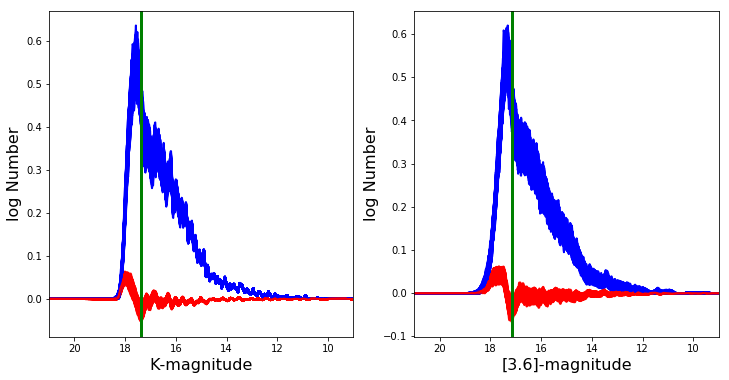

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [24]:
# 24

# NB: I am commenting out this whole cell
# because I don't need it to run every time
# I'm trying to get figures made.

plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
plt.savefig('CMD1_CMD2_MCKDE.pdf')

low_error_jMINUSkDATA = jMINUSkDATA[(jMINUSkDATA.eJmag < 0.1) & (jMINUSkDATA.eKmag < 0.1)]
low_error_jMINUSthreesixDATA = jMINUSthreesixDATA[(jMINUSthreesixDATA.eJmag < 0.1) & (jMINUSthreesixDATA.e36mag < 0.1)]

import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from scipy.signal import savgol_filter

def getdata(infile = 'jMINUSk.csv', magname = 'Kmag', dmagname = 'eKmag'):
    #table = np.genfromtxt(infile, delimiter = ',')#, dtype = 'i8, f8, f8, f8, f8, f8, f8, f8, f8')
    table = np.genfromtxt(infile, delimiter = ',', skip_header = 1, dtype = \
                          [('ID', 'i8'), ('RA', 'f8'), ('DEC', 'f8'), ('Jmag', 'f8'), ('eJmag', 'f8'), \
                           ('Kmag', 'f8'), ('eKmag', 'f8'), ('jMINUSk', 'f8'), ('ejMINUSk', 'f8')]) 
    m = table[magname]
    dm = table[dmagname]
    return m, dm

def doplot(x, pdfx, deriv = 0, data = 0, first = True, last = False):
    if first: plt.figure(figsize = (8,8))
    ax1.plot(x, pdfx, 'k', lw = 2, label = 'KDE', color='blue')
    #if len(data) != 1 and data[0] != 0:
    #    plt.hist(data, bins = bins, normed = True, label = 'Binned data')
    try:
        scale = np.max(pdfx)/np.max(deriv)/10.
        ax1.plot(x, deriv*scale, 'r', lw = 2, label = 'dKDE', color='red')
    except:
        print('no derivatives specified')
    if last:
        ax1.set_xlabel('K-magnitude', size=16)
        ax1.set_ylabel('log Number', size=16)
        ax1.set_xlim(21.,9.)
        #plt.ylim(-0.075,0.525)
        #plt.axvline(x=17.39, linewidth=3.0, color='lightgreen') # TRGB (all points)
        ax1.axvline(x=17.36, linewidth=3.0, color='green') # TRGB (error > 0.1 dex)
        #ax1.grid(True)
        #plt.show()
        #plt.close()
        #plt.savefig('CMD1_MCKDE_TRGB_paper.pdf')
    #if len(deriv) != 1 and deriv[0] != 0:
    #    scale = np.max(pdfx)/np.max(deriv)
    #    print(scale)
    #    plt.plot(x, deriv*scale, 'k', lw = 3, label = 'dKDE')
    #    #plt.plot(x, deriv, 'r', lw = 2, label = 'dKDE')

def trgbfind(infile = 'jMINUSk.csv', magname = 'Kmag', dmagname = 'eKmag', niter = 1000, kernel = 'epanechnikov'):

    #Read from input table into variables m and dm
    #m, dm = getdata(infile = infile)
    #m = jMINUSkHIST.Kmag
    #dm = jMINUSkHIST.eKmag
    m = low_error_jMINUSkDATA.Kmag
    dm = low_error_jMINUSkDATA.eKmag

    #Initialise stuff
    niter = 1000
    rtol = 1e-5
    kernel = 'epanechnikov' #parabolic kernel
    mx = np.linspace(max(m)*1.2, min(m)*0.8, 1000)
    trgbloc = np.zeros(niter)
    #Generate NITER realisations of the KDE

    for i in range(niter):
        msamp = np.random.normal(m, dm)
        #PS: Monte Carlo already smooths the distribution, so reduce the ideal binwidth a bit.
        bandwidth_factor = 0.25
        bandwidth = bandwidth_factor*(np.std(msamp)*(len(msamp)**(-0.2)))
        #Requires you to define the BANDWIDTH and KERNEL variables before this line.
        kde = neighbors.KernelDensity(bandwidth = bandwidth, rtol = rtol, kernel = kernel)
        kde.fit(msamp[:, np.newaxis])
        #MX is the x axis range over which the PDF is computed/plotted.
        #kde.score_samples returns ln(pdf)
        pdf = np.exp(kde.score_samples(mx[:, np.newaxis]))
        smooth_window = 31
        poly_degree = 3
        dpdf = savgol_filter(pdf, smooth_window, poly_degree, deriv = 1)
        trgbloc[i] = mx[np.argmin(dpdf)] #Most negative value corresponds to highest rate of decrease 
        #Plotting
        doplot(mx, pdf, deriv = dpdf, data = msamp, first = i == 0, last = i == niter - 1)
        #Use PDF to do stuff (e.g., detect edges)
        #result = do_stuff(pdf)
        #Store results of ith iteration
        #
        #

    trgbloc_mean = np.mean(trgbloc)
    trgbloc_sd = np.std(trgbloc)
    #return trgbloc_mean, trgbloc_sd
    #print(trgbloc_mean, trgbloc_sd) # this does the same as the above, just differently

trgbfind()

##########

def getdata(infile = 'jMINUSthreesix.csv', magname = 'k36mag', dmagname = 'e36mag'):
    #table = np.genfromtxt(infile, delimiter = ',')#, dtype = 'i8, f8, f8, f8, f8, f8, f8, f8, f8')
    table = np.genfromtxt(infile, delimiter = ',', skip_header = 1, dtype = \
                          [('ID', 'i8'), ('RA', 'f8'), ('DEC', 'f8'), ('k36mag', 'f8'), ('e36mag', 'f8'), \
                           ('Jmag', 'f8'), ('eJmag', 'f8'), ('jMINUSthreesix', 'f8'), ('ejMINUSthreesix', 'f8')]) 
    m = table['k36mag']
    dm = table['e36mag']
    return m, dm

def doplot(x, pdfx, deriv = 0, data = 0, first = True, last = False):
    if first: plt.figure(figsize = (8,8))
    ax2.plot(x, pdfx, 'k', lw = 2, label = 'KDE', color='blue')
    #if len(data) != 1 and data[0] != 0:
    #    plt.hist(data, bins = bins, normed = True, label = 'Binned data')
    try:
        scale = np.max(pdfx)/np.max(deriv)/10.
        ax2.plot(x, deriv*scale, 'r', lw = 2, label = 'dKDE', color='red')
    except:
        print('no derivatives specified')
    if last:
        ax2.set_xlabel('[3.6]-magnitude', size=16)
        ax2.set_ylabel('log Number', size=16)
        ax2.set_xlim(21.,9.)
        #plt.ylim(-0.075,0.525)
        ax2.axvline(x=17.155, linewidth=3.0, color='green') # TRGB (error > 0.1 dex)
        #ax2.grid(True)
        #plt.show()
        #plt.close()
        #plt.savefig('CMD2_MCKDE_TRGB_paper.pdf')
    #if len(deriv) != 1 and deriv[0] != 0:
    #    scale = np.max(pdfx)/np.max(deriv)
    #    print(scale)
    #    plt.plot(x, deriv*scale, 'k', lw = 3, label = 'dKDE')
    #    #plt.plot(x, deriv, 'r', lw = 2, label = 'dKDE')
   
def trgbfind(infile = 'jMINUSthreesix.csv', magname = 'k36mag', dmagname = 'e36mag', niter = 1000, kernel = 'epanechnikov'):

    #Read from input table into variables m and dm
    # m, dm = getdata(infile = infile)
    #m = jMINUSthreesixHIST.k36mag
    #dm = jMINUSkHIST.e36mag
    m = low_error_jMINUSthreesixDATA.k36mag
    dm = low_error_jMINUSthreesixDATA.e36mag

    #Initialise stuff
    niter = 1000
    rtol = 1e-5
    kernel = 'epanechnikov' #parabolic kernel
    mx = np.linspace(max(m)*1.2, min(m)*0.8, 1000)
    trgbloc = np.zeros(niter)
    #Generate NITER realisations of the KDE

    for i in range(niter):
        msamp = np.random.normal(m, dm)
        #PS: Monte Carlo already smooths the distribution, so reduce the ideal binwidth a bit.
        bandwidth_factor = 0.25
        bandwidth = bandwidth_factor*(np.std(msamp)*(len(msamp)**(-0.2)))
        #Requires you to define the BANDWIDTH and KERNEL variables before this line.
        kde = neighbors.KernelDensity(bandwidth = bandwidth, rtol = rtol, kernel = kernel)
        kde.fit(msamp[:, np.newaxis])
        #MX is the x axis range over which the PDF is computed/plotted.
        #kde.score_samples returns ln(pdf)
        pdf = np.exp(kde.score_samples(mx[:, np.newaxis]))
        smooth_window = 31
        poly_degree = 3
        dpdf = savgol_filter(pdf, smooth_window, poly_degree, deriv = 1)
        trgbloc[i] = mx[np.argmin(dpdf)] #Most negative value corresponds to highest rate of decrease 
        #Plotting
        doplot(mx, pdf, deriv = dpdf, data = msamp, first = i == 0, last = i == niter - 1)
        #Use PDF to do stuff (e.g., detect edges)
        #result = do_stuff(pdf)
        #Store results of ith iteration
        #
        #

    trgbloc_mean = np.mean(trgbloc)
    trgbloc_sd = np.std(trgbloc)
    #return trgbloc_mean, trgbloc_sd
    #print(trgbloc_mean, trgbloc_sd) # this does the same as the above, just differently

trgbfind()



<SkyCoord (ICRS): (ra, dec) in deg
    (296.23333333, -14.80166667)>
(0.2419871794871795, 0.015518417886130455)
(-1.1003824080770503, 0.13802767408713468, 0.1316086611902294)
(0.19550561797752808, 0.013231674194003458)
(-1.0568448435697126, 0.1482318270852827, 0.14140717319721108)


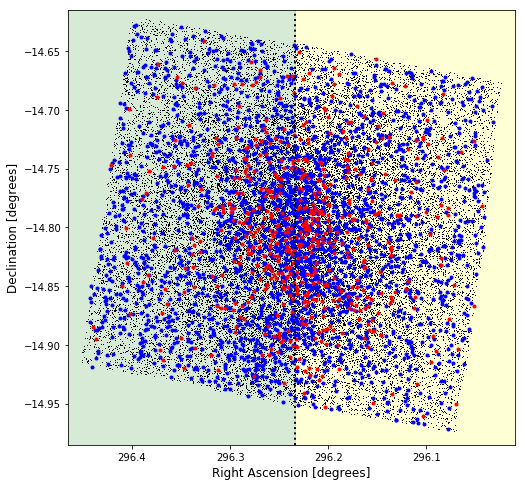

In [25]:
# 25

# Now let's make the relevant plots for our [Fe/H] analysis of NGC 6822.

# First off, I'll look at the metallicity gradient from left to right.

# Where's the center of NGC 6822?
# RA = 19 44 56, Dec = -14 48 06 (from Sibbons+2012)

NGC6822_center = SkyCoord("19h44m56s-14d48m06s")
print(NGC6822_center)

### quadrants

Orich_upper_left = Orich[(Orich.RA < NGC6822_center.ra) & (Orich.Dec > NGC6822_center.dec)]
Crich_upper_left = Crich[(Crich.RA < NGC6822_center.ra) & (Crich.Dec > NGC6822_center.dec)]

Orich_upper_right = Orich[(Orich.RA > NGC6822_center.ra) & (Orich.Dec > NGC6822_center.dec)]
Crich_upper_right = Crich[(Crich.RA > NGC6822_center.ra) & (Crich.Dec > NGC6822_center.dec)]

Orich_lower_left = Orich[(Orich.RA < NGC6822_center.ra) & (Orich.Dec < NGC6822_center.dec)]
Crich_lower_left = Crich[(Crich.RA < NGC6822_center.ra) & (Crich.Dec < NGC6822_center.dec)]

Orich_lower_right = Orich[(Orich.RA > NGC6822_center.ra) & (Orich.Dec < NGC6822_center.dec)]
Crich_lower_right = Crich[(Crich.RA > NGC6822_center.ra) & (Crich.Dec < NGC6822_center.dec)]

# halfs (along N-S bar, more or less)

Orich_left = Orich[(Orich.RA < NGC6822_center.ra)]
Crich_left = Crich[(Crich.RA < NGC6822_center.ra)]

Orich_right = Orich[(Orich.RA > NGC6822_center.ra)]
Crich_right = Crich[(Crich.RA > NGC6822_center.ra)]

#print(len(Orich_left))
#print(len(Crich_left))

#print(len(Orich_right))
#print(len(Crich_right))

# C/O and [Fe/H] for the left half

ratio_C_O_left = c2o_calc(len(Crich_left), len(Orich_left))
print(ratio_C_O_left)

ratio_Fe_H_left = metallicity_calc(ratio_C_O_left[0], ratio_C_O_left[1])
print(ratio_Fe_H_left)

# C/O and [Fe/H] for the right half

ratio_C_O_right = c2o_calc(len(Crich_right), len(Orich_right))
print(ratio_C_O_right)

ratio_Fe_H_right = metallicity_calc(ratio_C_O_right[0], ratio_C_O_right[1])
print(ratio_Fe_H_right)

# The above calculations are showing that the C/M ratios for the left and right halves
# of NGC 6822 are 0.24 +/- 0.02 and 0.20 +/- 0.01, respectively.
# [Fe/H] values for the left and right halves
# of NGC 6822 are -1.10 +/- 0.13 and -1.06 +/- 0.14, respectively.

##########

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(Orich_left.RA, Orich_left.Dec, '.', color='blue')
plt.plot(Crich_left.RA, Crich_left.Dec, '.', color='red')
plt.plot(Orich_right.RA, Orich_right.Dec, '.', color='blue')
plt.plot(Crich_right.RA, Crich_right.Dec, '.', color='red')

#plt.xlim(296.01, 296.465)
plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [degrees]', size=12)
plt.ylabel('Declination [degrees]', size=12)

plt.axvline(x=296.23333333, linewidth=2.0, color='black', linestyle='dotted')

plt.axvspan(296.5, 296.23333333, alpha=0.16, color='green')
plt.axvspan(296.23333333, 296.0, alpha=0.16, color='yellow')

#plt.grid(True)
#plt.show()
#plt.close()
#plt.savefig('C-to-O_split.pdf')


In [26]:
# 26

# Second, let's take a look at the radial gradient from the center and moving outward.

# In order to compute circular annuli, we need to determine
# the distance of a given point from the central coordinates.

raI2  = Angle(MASTERCAT.RA, unit=u.deg)
decI2 = Angle(MASTERCAT.Dec, unit=u.deg)
radec_I2 = SkyCoord(raI2, decI2, frame='fk5')

#radec = SkyCoord((MASTERCAT.RA, MASTERCAT.Dec), frame='fk5')

sepfromNGC6822 = NGC6822_center.separation(radec_I2)

#print(sepfromNGC6822)

# Here we make circular annuli from the whole sample,
# starting from the center and going out to the quarter-light radius,
# the half-light radius, etc., up to a total of six rings.

in_galaxy1_idx = np.where(sepfromNGC6822.arcmin < 1.325)
in_galaxy2_idx = np.where((sepfromNGC6822.arcmin > 1.325) & (sepfromNGC6822.arcmin < 2.65))
in_galaxy3_idx = np.where((sepfromNGC6822.arcmin > 2.65) & (sepfromNGC6822.arcmin < 3.975))
in_galaxy4_idx = np.where((sepfromNGC6822.arcmin > 3.975) & (sepfromNGC6822.arcmin < 5.3))
in_galaxy5_idx = np.where((sepfromNGC6822.arcmin > 5.3) & (sepfromNGC6822.arcmin < 6.625))
in_galaxy6_idx = np.where((sepfromNGC6822.arcmin > 6.625) & (sepfromNGC6822.arcmin < 7.95))

sepfromNGC6822[in_galaxy1_idx]
sepfromNGC6822[in_galaxy2_idx]
sepfromNGC6822[in_galaxy3_idx]
sepfromNGC6822[in_galaxy4_idx]
sepfromNGC6822[in_galaxy5_idx]
sepfromNGC6822[in_galaxy6_idx]

#print(len(sepfromNGC6822[in_galaxy1_idx]))
#print(len(sepfromNGC6822[in_galaxy2_idx]))
#print(len(sepfromNGC6822[in_galaxy3_idx]))
#print(len(sepfromNGC6822[in_galaxy4_idx]))
#print(len(sepfromNGC6822[in_galaxy5_idx]))
#print(len(sepfromNGC6822[in_galaxy6_idx]))


<Angle [0.1201244 , 0.11389023, 0.12998529, ..., 0.12552887, 0.11607115,
        0.11347379] deg>

In [27]:
# 27

# C-rich stars only

Crichra  = Angle(Crich.RA, unit=u.deg)
Crichdec = Angle(Crich.Dec, unit=u.deg)
Crichradec = SkyCoord(Crichra, Crichdec, frame='fk5')

#radec = SkyCoord((Crich.RA, Crich.Dec), frame='fk5')

CrichsepfromNGC6822 = NGC6822_center.separation(Crichradec)

#print(sepfromNGC6822)

Crich_in_galaxy1_idx = np.where(CrichsepfromNGC6822.arcmin < 1.325)
Crich_in_galaxy2_idx = np.where((CrichsepfromNGC6822.arcmin > 1.325) & (CrichsepfromNGC6822.arcmin < 2.65))
Crich_in_galaxy3_idx = np.where((CrichsepfromNGC6822.arcmin > 2.65) & (CrichsepfromNGC6822.arcmin < 3.975))
Crich_in_galaxy4_idx = np.where((CrichsepfromNGC6822.arcmin > 3.975) & (CrichsepfromNGC6822.arcmin < 5.3))
Crich_in_galaxy5_idx = np.where((CrichsepfromNGC6822.arcmin > 5.3) & (CrichsepfromNGC6822.arcmin < 6.625))
Crich_in_galaxy6_idx = np.where((CrichsepfromNGC6822.arcmin > 6.625) & (CrichsepfromNGC6822.arcmin < 7.95))

Crich1 = CrichsepfromNGC6822[Crich_in_galaxy1_idx]
Crich2 = CrichsepfromNGC6822[Crich_in_galaxy2_idx]
Crich3 = CrichsepfromNGC6822[Crich_in_galaxy3_idx]
Crich4 = CrichsepfromNGC6822[Crich_in_galaxy4_idx]
Crich5 = CrichsepfromNGC6822[Crich_in_galaxy5_idx]
Crich6 = CrichsepfromNGC6822[Crich_in_galaxy6_idx]

#print(len(CrichsepfromNGC6822[Crich_in_galaxy1_idx]))
#print(len(CrichsepfromNGC6822[Crich_in_galaxy2_idx]))
#print(len(CrichsepfromNGC6822[Crich_in_galaxy3_idx]))
#print(len(CrichsepfromNGC6822[Crich_in_galaxy4_idx]))
#print(len(CrichsepfromNGC6822[Crich_in_galaxy5_idx]))
#print(len(CrichsepfromNGC6822[Crich_in_galaxy6_idx]))

# O-rich stars only

Orichra  = Angle(Orich.RA, unit=u.deg)
Orichdec = Angle(Orich.Dec, unit=u.deg)
Orichradec = SkyCoord(Orichra, Orichdec, frame='fk5')

#radec = SkyCoord((Orich.RA, Orich.Dec), frame='fk5')

OrichsepfromNGC6822 = NGC6822_center.separation(Orichradec)

#print(sepfromNGC6822)

Orich_in_galaxy1_idx = np.where(OrichsepfromNGC6822.arcmin < 1.325)
Orich_in_galaxy2_idx = np.where((OrichsepfromNGC6822.arcmin > 1.325) & (OrichsepfromNGC6822.arcmin < 2.65))
Orich_in_galaxy3_idx = np.where((OrichsepfromNGC6822.arcmin > 2.65) & (OrichsepfromNGC6822.arcmin < 3.975))
Orich_in_galaxy4_idx = np.where((OrichsepfromNGC6822.arcmin > 3.975) & (OrichsepfromNGC6822.arcmin < 5.3))
Orich_in_galaxy5_idx = np.where((OrichsepfromNGC6822.arcmin > 5.3) & (OrichsepfromNGC6822.arcmin < 6.625))
Orich_in_galaxy6_idx = np.where((OrichsepfromNGC6822.arcmin > 6.625) & (OrichsepfromNGC6822.arcmin < 7.95))

Orich1 = OrichsepfromNGC6822[Orich_in_galaxy1_idx]
Orich2 = OrichsepfromNGC6822[Orich_in_galaxy2_idx]
Orich3 = OrichsepfromNGC6822[Orich_in_galaxy3_idx]
Orich4 = OrichsepfromNGC6822[Orich_in_galaxy4_idx]
Orich5 = OrichsepfromNGC6822[Orich_in_galaxy5_idx]
Orich6 = OrichsepfromNGC6822[Orich_in_galaxy6_idx]

#print(len(OrichsepfromNGC6822[Orich_in_galaxy1_idx]))
#print(len(OrichsepfromNGC6822[Orich_in_galaxy2_idx]))
#print(len(OrichsepfromNGC6822[Orich_in_galaxy3_idx]))
#print(len(OrichsepfromNGC6822[Orich_in_galaxy4_idx]))
#print(len(OrichsepfromNGC6822[Orich_in_galaxy5_idx]))
#print(len(OrichsepfromNGC6822[Orich_in_galaxy6_idx]))


(-14.985, -14.615)

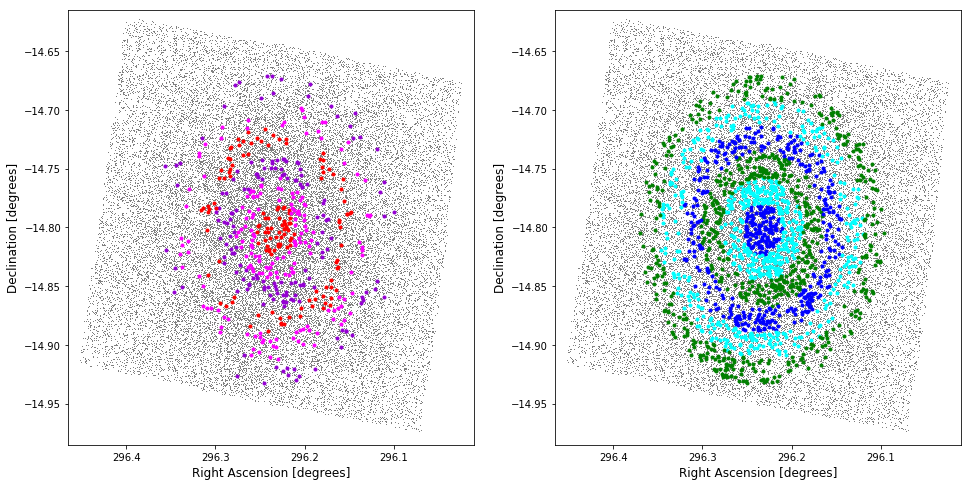

In [28]:
# 28

# Make plots to show these annuli for each of the
# C-rich and O-rich AGB star candidates!

plt.figure(figsize=(16,8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

Crichastropytable = Table.from_pandas(Crich)

Crichtest = Crichastropytable[Crich_in_galaxy1_idx]

Crich1 = Crichtest.to_pandas()

##########

Orichastropytable = Table.from_pandas(Orich)

Orichtest = Orichastropytable[Orich_in_galaxy1_idx]

Orich1 = Orichtest.to_pandas()

##########

#plt.figure(figsize=(8,8))
ax1.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='gray')

ax1.plot(Crichastropytable[Crich_in_galaxy1_idx]['RA'], Crichastropytable[Crich_in_galaxy1_idx]['Dec'], '.', color='red')
ax1.plot(Crichastropytable[Crich_in_galaxy2_idx]['RA'], Crichastropytable[Crich_in_galaxy2_idx]['Dec'], '.', color='magenta')
ax1.plot(Crichastropytable[Crich_in_galaxy3_idx]['RA'], Crichastropytable[Crich_in_galaxy3_idx]['Dec'], '.', color='darkviolet')
ax1.plot(Crichastropytable[Crich_in_galaxy4_idx]['RA'], Crichastropytable[Crich_in_galaxy4_idx]['Dec'], '.', color='red')
ax1.plot(Crichastropytable[Crich_in_galaxy5_idx]['RA'], Crichastropytable[Crich_in_galaxy5_idx]['Dec'], '.', color='magenta')
ax1.plot(Crichastropytable[Crich_in_galaxy6_idx]['RA'], Crichastropytable[Crich_in_galaxy6_idx]['Dec'], '.', color='darkviolet')

#ax1.set_xlim(296.01, 296.465)
ax1.set_xlim(296.465, 296.01)
ax1.set_ylim(-14.985, -14.615)

ax1.set_xlabel('Right Ascension [degrees]', size=12)
ax1.set_ylabel('Declination [degrees]', size=12)

#ax1.grid(True)
#plt.show()
#plt.close()
#plt.savefig('C-to-O_C_annuli.pdf')

##########

#plt.figure(figsize=(8,8))
ax2.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='gray')

ax2.plot(Orichastropytable[Orich_in_galaxy1_idx]['RA'], Orichastropytable[Orich_in_galaxy1_idx]['Dec'], '.', color='blue')
ax2.plot(Orichastropytable[Orich_in_galaxy2_idx]['RA'], Orichastropytable[Orich_in_galaxy2_idx]['Dec'], '.', color='cyan')
ax2.plot(Orichastropytable[Orich_in_galaxy3_idx]['RA'], Orichastropytable[Orich_in_galaxy3_idx]['Dec'], '.', color='green')
ax2.plot(Orichastropytable[Orich_in_galaxy4_idx]['RA'], Orichastropytable[Orich_in_galaxy4_idx]['Dec'], '.', color='blue')
ax2.plot(Orichastropytable[Orich_in_galaxy5_idx]['RA'], Orichastropytable[Orich_in_galaxy5_idx]['Dec'], '.', color='cyan')
ax2.plot(Orichastropytable[Orich_in_galaxy6_idx]['RA'], Orichastropytable[Orich_in_galaxy6_idx]['Dec'], '.', color='green')

ax2.set_xlabel('Right Ascension [degrees]', size=12)
ax2.set_ylabel('Declination [degrees]', size=12)

#ax2.set_xlim(296.01, 296.465)
ax2.set_xlim(296.465, 296.01)
ax2.set_ylim(-14.985, -14.615)

#ax2.grid(True)
#plt.show()
#plt.close()
#plt.savefig('C-to-O_both.pdf')


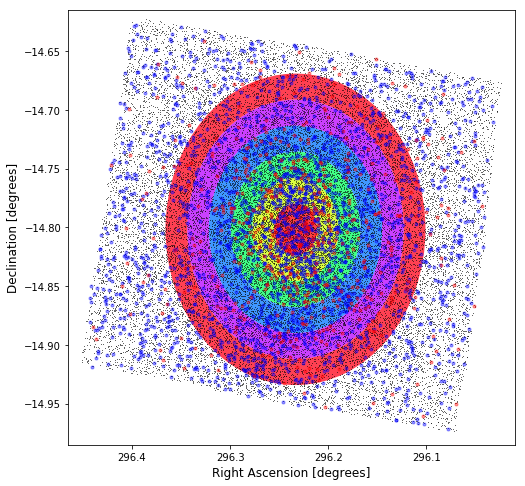

In [29]:
# 29

# Since my radial metallicity gradient plots are so horrible,
# here I'm going to try to make them easier to look at.
# I'll avoid re-coloring my points, instead using circle plots.

import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
#np.random.seed(54654)

fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(296.465, 296.01)
ax.set_ylim(-14.985, -14.615)

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((296.23333333, -14.80166667), .0220833333, 0, 360),                      # quarter-light
    Wedge((296.23333333, -14.80166667), .0220833333, 0, 360, width=0.06625),       # half-light
    Wedge((296.23333333, -14.80166667), .0441666667, 0, 360, width=0.1102916666),  # three-quarter-light
    Wedge((296.23333333, -14.80166667), .0883333332, 0, 360, width=0.1545833331),  # full-light
    Wedge((296.23333333, -14.80166667), .0883333332, 0, 360, width=0.1987499997),  # one-and-one-quarter-light
    Wedge((296.23333333, -14.80166667), .1324999998, 0, 360, width=0.2429166663),  # one-and-one-half-light
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), True)
    patches.append(polygon)

#colors = 100*np.random.rand(len(patches))
colors = np.linspace(0, 1, 6)
p = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.75)
p.set_array(np.array(colors))
ax.add_collection(p)

ax.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black', alpha=0.6)
ax.plot(Orich.RA, Orich.Dec, '.', color='blue', alpha=0.4)
ax.plot(Crich.RA, Crich.Dec, '.', color='red', alpha=0.4)

#ax.grid(True)

ax.set_xlabel('Right Ascension [degrees]', size=12)
ax.set_ylabel('Declination [degrees]', size=12)

plt.show()

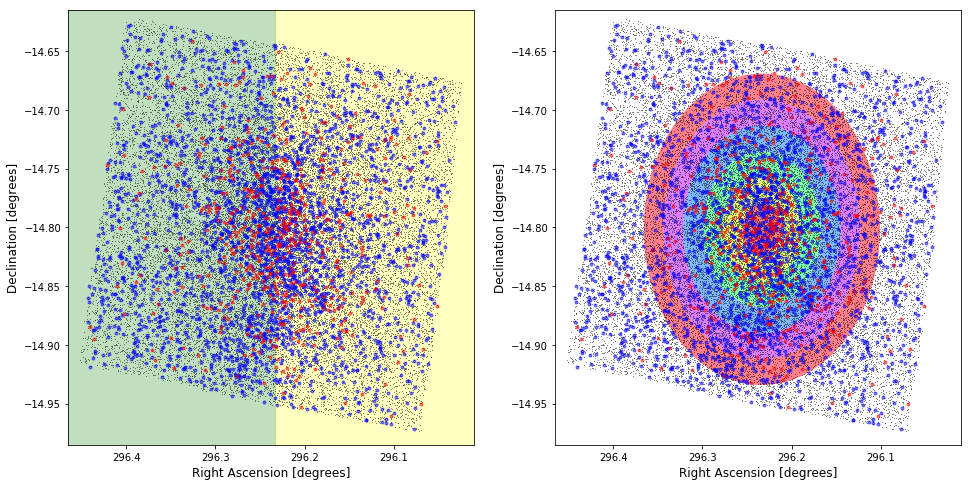

In [30]:
# 30

# Can I put the transverse and radial gradient plots in one Figure?

import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

##########

ax1.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black', alpha=0.5)
ax1.plot(Orich.RA, Orich.Dec, '.', color='blue', alpha=0.5)
ax1.plot(Crich.RA, Crich.Dec, '.', color='red', alpha=0.5)

ax1.set_xlim(296.465, 296.01)
ax1.set_ylim(-14.985, -14.615)

ax1.axvspan(296.5, 296.23333333, alpha=0.25, color='green')
ax1.axvspan(296.23333333, 296.0, alpha=0.25, color='yellow')

ax1.set_xlabel('Right Ascension [degrees]', size=12)
ax1.set_ylabel('Declination [degrees]', size=12)

##########

#ax2.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
#ax2.plot(Orich.RA, Orich.Dec, '.', color='blue')
#ax2.plot(Crich.RA, Crich.Dec, '.', color='red')

#ax2.set_xlim(296.465, 296.01)
#ax2.set_ylim(-14.985, -14.615)

#ax2.set_xlabel('Right Ascension [degrees]', size=12)
#ax2.set_ylabel('Declination [degrees]', size=12)

#fig, ax2 = plt.subplots(figsize=(8,8))
ax2.set_xlim(296.465, 296.01)
ax2.set_ylim(-14.985, -14.615)

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((296.23333333, -14.80166667), .0220833333, 0, 360),                      # quarter-light
    Wedge((296.23333333, -14.80166667), .0220833333, 0, 360, width=0.06625),       # half-light
    Wedge((296.23333333, -14.80166667), .0441666667, 0, 360, width=0.1102916666),  # three-quarter-light
    Wedge((296.23333333, -14.80166667), .0883333332, 0, 360, width=0.1545833331),  # full-light
    Wedge((296.23333333, -14.80166667), .0883333332, 0, 360, width=0.1987499997),  # one-and-one-quarter-light
    Wedge((296.23333333, -14.80166667), .1324999998, 0, 360, width=0.2429166663),  # one-and-one-half-light
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), True)
    patches.append(polygon)

#colors = 100*np.random.rand(len(patches))
colors = np.linspace(0, 1, 6)
p = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.5)
p.set_array(np.array(colors))
ax2.add_collection(p)

ax2.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black', alpha=0.5)
ax2.plot(Orich.RA, Orich.Dec, '.', color='blue', alpha=0.5)
ax2.plot(Crich.RA, Crich.Dec, '.', color='red', alpha=0.5)

ax2.set_xlim(296.465, 296.01)
ax2.set_ylim(-14.985, -14.615)

ax2.set_xlabel('Right Ascension [degrees]', size=12)
ax2.set_ylabel('Declination [degrees]', size=12)

#ax.grid(True)

plt.show()

#plt.savefig('C-to-O_twofer.pdf')


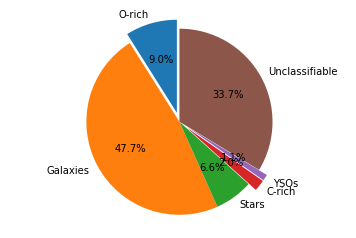

In [31]:
# 31

# How do I display the breakdown of the different stellar types
# as a function of the whole sample (n = 30,745)?

# Pie Chart: RELIABLE

#labels = 'O-rich', 'Galaxies', 'Stars', 'C-rich', 'YSOs', 'Unclassifiable'#, 'Candidates', 'Else'
#data_reliable = [2583, 13765, 1911, 563, 310, 9706]#, 247, 1660]
#explode = (0.1, 0, 0, 0.1, 0.1, 0)#, 0, 0)

#fig1, ax1 = plt.subplots()
#ax1.pie(data_reliable, explode=explode, labels=labels, autopct='%1.1f%%',
#        shadow=False, startangle=90)
#ax1=axis('equal')
#plt.show()
#plt.savefig('RELIABLE1_pie_chart.pdf')

labels = 'O-rich', 'Galaxies', 'Stars', 'C-rich', 'YSOs', 'Unclassifiable'#, 'Candidates', 'Else'
data_reliable = [2583, 13765, 1911, 563, 310, 9706]#, 247, 1660]
colors_reliable = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
explode = (0.1, 0, 0, 0.1, 0.1, 0)#, 0, 0)

plt.pie(data_reliable, explode=explode, labels=labels, colors=colors_reliable, autopct='%1.1f%%',
        shadow=False, startangle=90)

plt.axis('equal')
plt.show()

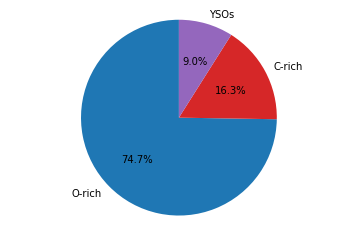

In [32]:
# 32

# Pie Chart: RELIABLE - O-rich, C-rich, YSO

#labels = 'O-rich', '', '', 'C-rich', 'YSOs'
#data_reliable2 = [2583, 0, 0, 563, 310]
#explode = (0, 0, 0, 0, 0)

#fig1, ax1 = plt.subplots()
#ax1.pie(data_reliable2, explode=explode, labels=labels, autopct='%1.1f%%',
#        shadow=False, startangle=90)
#ax1=axis('equal')
#plt.show()
#plt.savefig('RELIABLE2_pie_chart.pdf')

labels = 'O-rich', 'C-rich', 'YSOs'
data_reliable2 = [2583, 563, 310]
colors_reliable2 = ['tab:blue', 'tab:red', 'tab:purple']
explode = (0, 0, 0)

plt.pie(data_reliable2, explode=explode, labels=labels, colors=colors_reliable2, autopct='%1.1f%%',
        shadow=False, startangle=90)

plt.axis('equal')
plt.show()
#plt.savefig('piechart_RELIABLE2.pdf')

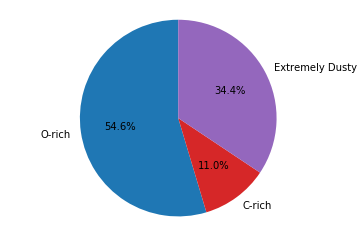

In [33]:
# 33

# Pie Chart: CANDIDATE

#labels = 'O-rich', 'Extremely Dusty', 'Star', 'C-rich'
#data_candidate = [124, 84, 20, 27] # 6 Dusty and 2 C-rich were duplicates
                                    # of RELIABLE YSOs
#data_candidate = [124, 78, 20, 25]
#explode = (0, 0, 0, 0)

#fig1, ax1 = plt.subplots()
#ax1.pie(data_candidate, explode=explode, labels=labels, autopct='%1.1f%%',
#        shadow=False, startangle=90)
#ax1=axis('equal')
#plt.show()
#plt.savefig('CANDIDATE_pie_chart.pdf')

labels = 'O-rich', 'C-rich', 'Extremely Dusty'
#, 'Star'
data_candidate = [124, 25, 78]
#, 20]
colors_candidate = ['tab:blue', 'tab:red', 'tab:purple']
#, 'tab:green']
explode = (0, 0, 0)
#, 0)

plt.pie(data_candidate, explode=explode, labels=labels, colors=colors_candidate, autopct='%1.1f%%',
        shadow=False, startangle=90)

plt.axis('equal')
plt.show()
#plt.savefig('piechart_CANDIDATE2.pdf')

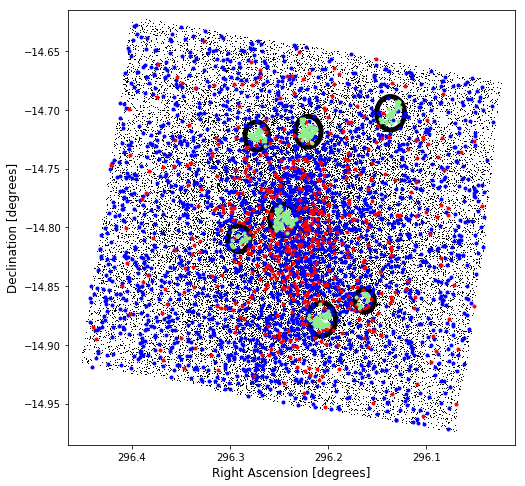

In [34]:
# 34

# Make a function to deterine if a point source is within a cirlce

def in_circle(center_x, center_y, radius, x, y):
    square_dist = (center_x - x) ** 2 + (center_y - y) ** 2
    return square_dist <= radius ** 2

# Read in the SF regions in NGC 6822
SFregions = ascii.read('/Users/ahirschauer/Documents/Year2/03-2019/NGC6822/SFreg_NGC6822.csv')

# Parse this into coordinates and angle units
ra_decSFR = SkyCoord(SFregions['RA'], SFregions['Dec'], unit=(u.deg, u.deg), frame='fk5')
radSFR = Angle(SFregions['Radius'] * u.arcsec)

YSO1a = MASTERCAT[(MASTERCAT.CMD3region == 5) | (MASTERCAT.CMD2region == 5) | (MASTERCAT.CMD1region == 5)]
# plus, in the regions as defined by the spatial distribution criteria plotted below

# Find which SF region if any the stars are in

inregion0_idx = in_circle(ra_decSFR[0].ra.deg, ra_decSFR[0].dec.deg, radSFR[0].deg, YSO1a.RA, YSO1a.Dec)
inregion1_idx = in_circle(ra_decSFR[1].ra.deg, ra_decSFR[1].dec.deg, radSFR[1].deg, YSO1a.RA, YSO1a.Dec)
inregion2_idx = in_circle(ra_decSFR[2].ra.deg, ra_decSFR[2].dec.deg, radSFR[2].deg, YSO1a.RA, YSO1a.Dec)
inregion3_idx = in_circle(ra_decSFR[3].ra.deg, ra_decSFR[3].dec.deg, radSFR[3].deg, YSO1a.RA, YSO1a.Dec)
inregion4_idx = in_circle(ra_decSFR[4].ra.deg, ra_decSFR[4].dec.deg, radSFR[4].deg, YSO1a.RA, YSO1a.Dec)
inregion5_idx = in_circle(ra_decSFR[5].ra.deg, ra_decSFR[5].dec.deg, radSFR[5].deg, YSO1a.RA, YSO1a.Dec)
inregion6_idx = in_circle(ra_decSFR[6].ra.deg, ra_decSFR[6].dec.deg, radSFR[6].deg, YSO1a.RA, YSO1a.Dec)
inregion7_idx = in_circle(ra_decSFR[7].ra.deg, ra_decSFR[7].dec.deg, radSFR[7].deg, YSO1a.RA, YSO1a.Dec)
inregion8_idx = in_circle(ra_decSFR[8].ra.deg, ra_decSFR[8].dec.deg, radSFR[8].deg, YSO1a.RA, YSO1a.Dec)
inregion9_idx = in_circle(ra_decSFR[9].ra.deg, ra_decSFR[9].dec.deg, radSFR[9].deg, YSO1a.RA, YSO1a.Dec)
inregion10_idx = in_circle(ra_decSFR[10].ra.deg, ra_decSFR[10].dec.deg, radSFR[10].deg, YSO1a.RA, YSO1a.Dec)

# Now need to combine the idx to find if in a SFR

# Make a master array of if in SFR
inSFR_idx_array = np.array([inregion0_idx, inregion1_idx, inregion2_idx, inregion3_idx, inregion4_idx, inregion5_idx, inregion9_idx])
# inregion6_idx, inregion7_idx, inregion8_idx, inregion10_idx
# Make True/False list for the
inSFR_idx = np.empty(len(inSFR_idx_array.T))

# To itterare over columns need to transpose the array
for counter, row in enumerate(inSFR_idx_array.T):
    inSFR_idx[counter] = row.any()

# Now Convert back to an index value for the array
inSFR_idx = np.where(inSFR_idx == 1)

YSOastropytable = Table.from_pandas(YSO1a)

plt.figure(figsize=(8,8))
plt.plot(MASTERCAT.RA, MASTERCAT.Dec, ',', color='black')
plt.plot(Orich.RA, Orich.Dec, '.', color='blue')
plt.plot(Crich.RA, Crich.Dec, '.', color='red')

# Plot the SF region circle in the image
circle0 = plt.Circle((ra_decSFR[0].ra.deg, ra_decSFR[0].dec.deg), radSFR[0].deg, linewidth=5.0, color='black', fill=False)
circle1 = plt.Circle((ra_decSFR[1].ra.deg, ra_decSFR[1].dec.deg), radSFR[1].deg, linewidth=5.0, color='black', fill=False)
circle2 = plt.Circle((ra_decSFR[2].ra.deg, ra_decSFR[2].dec.deg), radSFR[2].deg, linewidth=5.0, color='black', fill=False)
circle3 = plt.Circle((ra_decSFR[3].ra.deg, ra_decSFR[3].dec.deg), radSFR[3].deg, linewidth=5.0, color='black', fill=False)
circle4 = plt.Circle((ra_decSFR[4].ra.deg, ra_decSFR[4].dec.deg), radSFR[4].deg, linewidth=5.0, color='black', fill=False)
circle5 = plt.Circle((ra_decSFR[5].ra.deg, ra_decSFR[5].dec.deg), radSFR[5].deg, linewidth=5.0, color='black', fill=False)
#circle6 = plt.Circle((ra_decSFR[6].ra.deg, ra_decSFR[6].dec.deg), radSFR[6].deg, linewidth=5.0, color='magenta', fill=True)
#circle7 = plt.Circle((ra_decSFR[7].ra.deg, ra_decSFR[7].dec.deg), radSFR[7].deg, linewidth=5.0, color='magenta', fill=True)
#circle8 = plt.Circle((ra_decSFR[8].ra.deg, ra_decSFR[8].dec.deg), radSFR[8].deg, linewidth=5.0, color='magenta', fill=True)
circle9 = plt.Circle((ra_decSFR[9].ra.deg, ra_decSFR[9].dec.deg), radSFR[9].deg, linewidth=5.0, color='black', fill=False)
#circle10 = plt.Circle((ra_decSFR[10].ra.deg, ra_decSFR[10].dec.deg), radSFR[10].deg, linewidth=5.0, color='magenta', fill=True)

# Add the circles to the image
plt.gcf().gca().add_artist(circle0)
plt.gcf().gca().add_artist(circle1)
plt.gcf().gca().add_artist(circle2)
plt.gcf().gca().add_artist(circle3)
plt.gcf().gca().add_artist(circle4)
plt.gcf().gca().add_artist(circle5)
#plt.gcf().gca().add_artist(circle6)
#plt.gcf().gca().add_artist(circle7)
#plt.gcf().gca().add_artist(circle8)
plt.gcf().gca().add_artist(circle9)
#plt.gcf().gca().add_artist(circle10)

# Plot the chosen populations
plt.plot(YSOastropytable['RA'][inSFR_idx], YSOastropytable['Dec'][inSFR_idx], '.', color='lightgreen', ms=6)

#YSOastropytable.to_csv('newYSOtable.csv')
#print(YSOastropytable)

#####

plt.xlim(296.465, 296.01)
#plt.xlim(296.01, 296.465)
plt.ylim(-14.985, -14.615)

#plt.axvline(x=296.2333, linewidth=3.0, color='black')

plt.xlabel('Right Ascension [degrees]', size=12)
plt.ylabel('Declination [degrees]', size=12)

#plt.grid(True)
plt.show()
#plt.close()

#plt.savefig('NGC6822_AGB_YSO_spatdist_11Sept2019.pdf')
